In [1]:
import pandas as pd
import torch
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp

import bionics.biofuzznet.biofuzznet as biofuzznet
import bionics.biofuzznet.biomixnet as biomixnet
import bionics.biofuzznet.utils as utils
import networkx as nx

/Users/adr/miniconda3/envs/constance_bionics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def compute_RMSE(predictions, ground_truth, nodes):
    """
    Compute the RMSE
    """
    rmse = {}
    for node in nodes:
        rmse[node] = torch.sqrt(
            torch.sum(
                (predictions[node] - ground_truth[node]) ** 2
            )
            / len(predictions[node])
        ).item()
    node = max(rmse, key=rmse.get)
    
    return rmse

# Results of 50-folds CV

## Positive loop

In [3]:
losses_1_pos = pickle.load(open("./CV_pos_100//losses.p", "rb"))
test_truth_1_pos= pickle.load(open("./CV_pos_100//test_truth.p", "rb"))
params_truth_1_pos = pickle.load(open("./CV_pos_100//params_truth.p", "rb"))
params_pred_1_pos = pickle.load(open("./CV_pos_100//params_pred.p", "rb"))
test_pred_1_pos = pickle.load(open("./CV_pos_100//test_pred.p", "rb"))

losses_2_pos = pickle.load(open("./CV_pos_bistabl_100///losses.p", "rb"))
test_truth_2_pos = pickle.load(open("./CV_pos_bistabl_100//test_truth.p", "rb"))
params_truth_2_pos = pickle.load(open("./CV_pos_bistabl_100//params_truth.p", "rb"))
params_pred_2_pos = pickle.load(open("./CV_pos_bistabl_100//params_pred.p", "rb"))
test_pred_2_pos = pickle.load(open("./CV_pos_bistabl_100//test_pred.p", "rb"))

In [4]:
rmses_pos_B = []
rmses_pos_C = []
rmses_bistabl_B = []
rmses_bistabl_C = []
rmses_rand_pos_B = []
rmses_rand_pos_C = []

for i in range(50):
    rmse = compute_RMSE(test_truth_1_pos[i], test_pred_1_pos[i], ["B", "C"])
    rmses_pos_B.append(rmse["B"])
    rmses_pos_C.append(rmse["C"])
    rand_dic = {"B": torch.rand(100), "C": torch.rand(100)}
    rmse = compute_RMSE(test_truth_1_pos[i], rand_dic, ["B", "C"])
    rmses_rand_pos_B.append(rmse["B"])
    rmses_rand_pos_C.append(rmse["C"])
for i in range(50):
    rmse = compute_RMSE(test_truth_2_pos[i], test_pred_2_pos[i], ["B", "C"])
    rmses_bistabl_B.append(rmse["B"])
    rmses_bistabl_C.append(rmse["C"])
    
RMSE_pos = pd.DataFrame()
RMSE_pos["B"] = pd.Series(rmses_pos_B)
RMSE_pos["C"] = pd.Series(rmses_pos_C)
RMSE_pos["B bistable"] = pd.Series(rmses_bistabl_B)
RMSE_pos["C bistable"] = pd.Series(rmses_bistabl_C)
RMSE_pos["B random"] = pd.Series(rmses_rand_pos_B)
RMSE_pos["C random"] = pd.Series(rmses_rand_pos_C)

Text(0, 0.5, 'RMSE over 50 simulations')

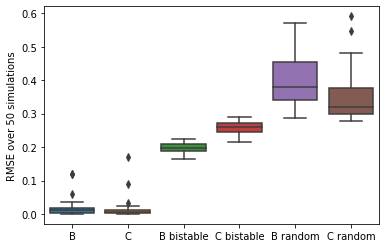

In [6]:
sns.boxplot(data = RMSE_pos)
plt.ylabel("RMSE over 50 simulations")

In [7]:
# Check which folds have RMSE > 0.05
RMSE_pos[RMSE_pos["B"]>0.05]

B         C  B bistable  C bistable  B random  C random
2   0.120002  0.170515    0.181634    0.248287  0.561173  0.546505
7   0.120629  0.088379    0.193147    0.252485  0.569852  0.319877
41  0.060126  0.009539    0.215829    0.273083  0.382683  0.362202

In [8]:
RMSE_pos[RMSE_pos["C"]>0.05]

B         C  B bistable  C bistable  B random  C random
2  0.120002  0.170515    0.181634    0.248287  0.561173  0.546505
7  0.120629  0.088379    0.193147    0.252485  0.569852  0.319877

## Negative loop

In [9]:
losses_2_neg = pickle.load(open("./CV_neg_oscill_100//losses.p", "rb"))
test_truth_2_neg = pickle.load(open("./CV_neg_oscill_100/test_truth.p", "rb"))
params_truth_2_neg = pickle.load(open("./CV_neg_oscill_100/params_truth.p", "rb"))
params_pred_2_neg = pickle.load(open("./CV_neg_oscill_100/params_pred.p", "rb"))
test_pred_2_neg = pickle.load(open("./CV_neg_oscill_100/test_pred.p", "rb"))


losses_1_neg = pickle.load(open("./CV_neg_100//losses.p", "rb"))
test_truth_1_neg = pickle.load(open("./CV_neg_100/test_truth.p", "rb"))
params_truth_1_neg = pickle.load(open("./CV_neg_100/params_truth.p", "rb"))
params_pred_1_neg = pickle.load(open("./CV_neg_100/params_pred.p", "rb"))
losses_1_neg = pickle.load(open("./CV_neg_100/losses.p", "rb"))
test_pred_1_neg = pickle.load(open("./CV_neg_100/test_pred.p", "rb"))



In [10]:
rmses_neg_B = []
rmses_neg_C = []
rmses_oscill_B = []
rmses_oscill_C = []
rmses_rand_neg_B = []
rmses_rand_neg_C = []
for i in range(50):
    rmse = compute_RMSE(test_truth_1_neg[i], test_pred_1_neg[i], ["B", "C"])
    rmses_neg_B.append(rmse["B"])
    rmses_neg_C.append(rmse["C"])
    rand_dic = {"B": torch.rand(100), "C": torch.rand(100)}
    rmse = compute_RMSE(test_truth_1_neg[i], rand_dic, ["B", "C"])
    rmses_rand_neg_B.append(rmse["B"])
    rmses_rand_neg_C.append(rmse["C"])
for i in range(50):
    rmse = compute_RMSE(test_truth_2_neg[i], test_pred_2_neg[i], ["B", "C"])
    rmses_oscill_B.append(rmse["B"])
    rmses_oscill_C.append(rmse["C"])
    
RMSE_neg = pd.DataFrame()
RMSE_neg["B"] = pd.Series(rmses_neg_B)
RMSE_neg["C"] = pd.Series(rmses_neg_C)
RMSE_neg["B \n oscillatory"] = pd.Series(rmses_oscill_B)
RMSE_neg["C \n oscillatory"] = pd.Series(rmses_oscill_C)
RMSE_neg["B random"] = pd.Series(rmses_rand_neg_B)
RMSE_neg["C random"] = pd.Series(rmses_rand_neg_C)

Text(0, 0.5, 'RMSE over 50 simulations')

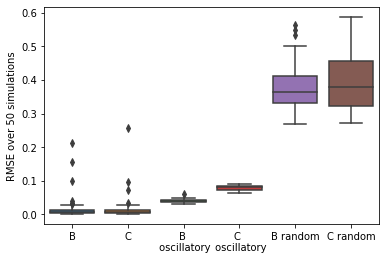

In [11]:
sns.boxplot(data = RMSE_neg)
plt.ylabel("RMSE over 50 simulations")

# Box plot of oscillation and bistable

Text(0, 0.5, 'RMSE over 50 simulations')

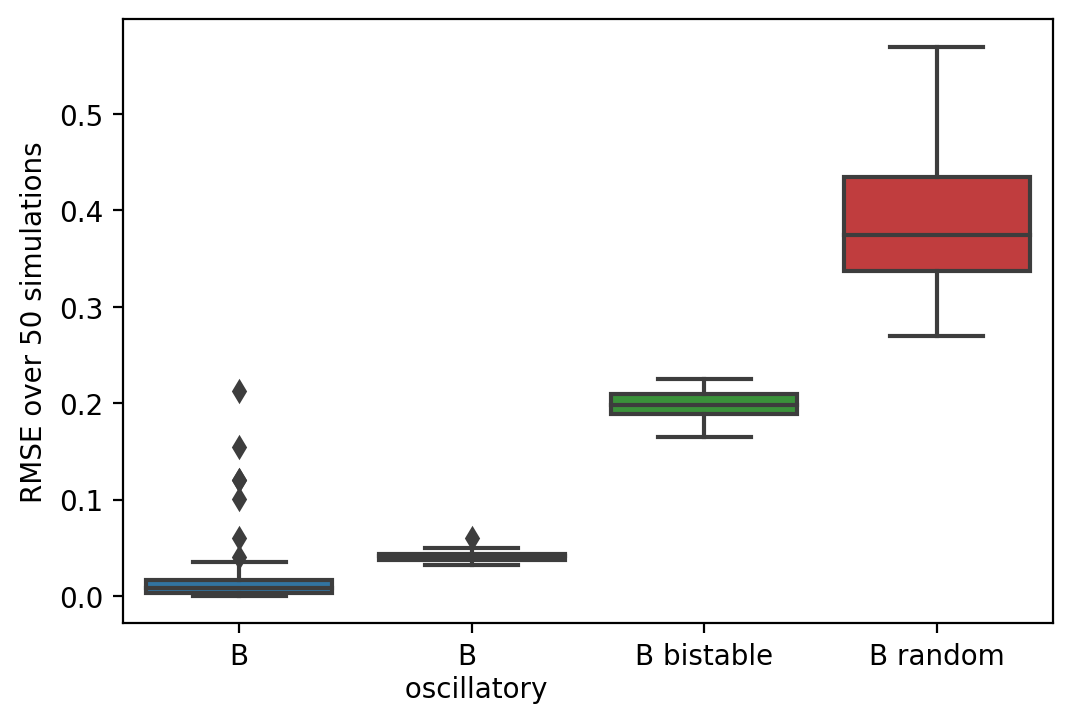

In [19]:
temp = pd.concat([RMSE_pos, RMSE_neg])
plt.figure(dpi=200)
sns.boxplot(data = temp[["B", "B \n oscillatory", "B bistable", "B random"]])
plt.ylabel("RMSE over 50 simulations")

In [14]:
temp

B         C  B bistable  C bistable  B random  C random  \
0   0.011966  0.005252    0.204354    0.266982  0.483283  0.394415   
1   0.015401  0.032803    0.205729    0.266315  0.367079  0.431088   
2   0.120002  0.170515    0.181634    0.248287  0.561173  0.546505   
3   0.003049  0.002390    0.200568    0.263224  0.303333  0.289638   
4   0.020205  0.008692    0.174551    0.232859  0.302779  0.357538   
..       ...       ...         ...         ...       ...       ...   
45  0.018738  0.014949         NaN         NaN  0.339788  0.392373   
46  0.001474  0.003410         NaN         NaN  0.284732  0.577730   
47  0.001971  0.001227         NaN         NaN  0.397800  0.532693   
48  0.004473  0.005568         NaN         NaN  0.412008  0.306062   
49  0.008061  0.006678         NaN         NaN  0.411644  0.353548   

    B \n oscillatory  C \n oscillatory  
0                NaN               NaN  
1                NaN               NaN  
2                NaN               NaN  
3                NaN               NaN  
4                NaN               NaN  
..               ...               ...  
45          0.043552          0.090401  
46          0.034411          0.074608  
47          0.037203          0.077265  
48          0.043343          0.075107  
49          0.036937          0.072704  

[100 rows x 8 columns]

In [14]:
RMSE_neg[RMSE_neg["B"]>0.05]

B         C  B \n oscillatory  C \n oscillatory  B random  C random
3   0.154757  0.096340          0.045523          0.082984  0.373147  0.341679
27  0.212884  0.258046          0.043505          0.085114  0.449478  0.524319
35  0.100824  0.072077          0.043570          0.084646  0.369218  0.422238

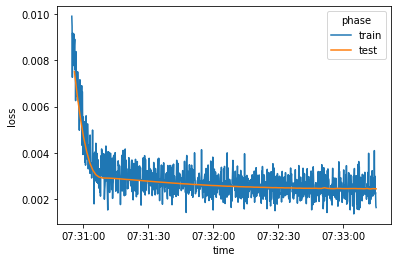

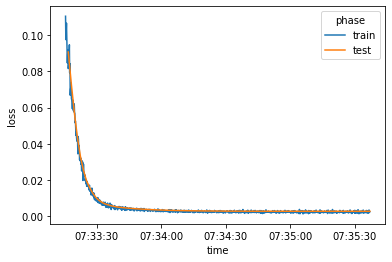

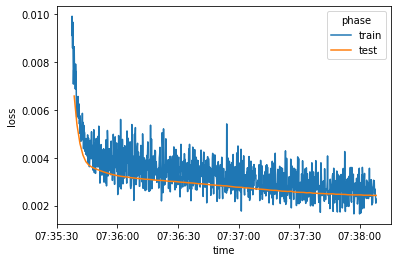

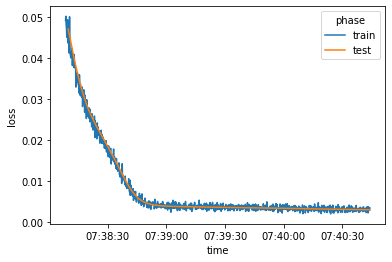

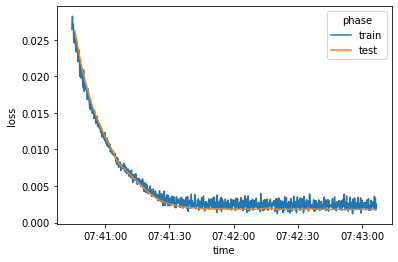

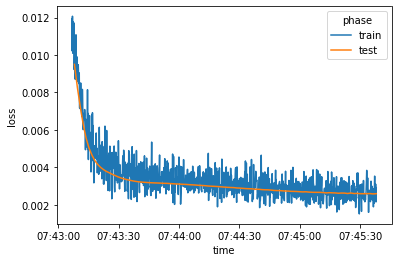

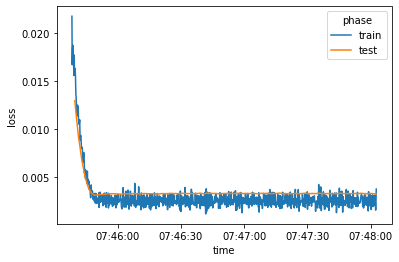

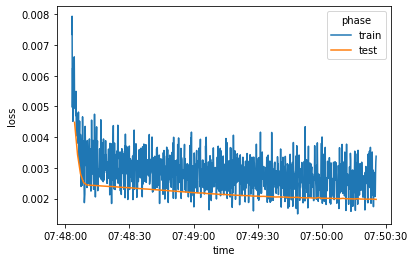

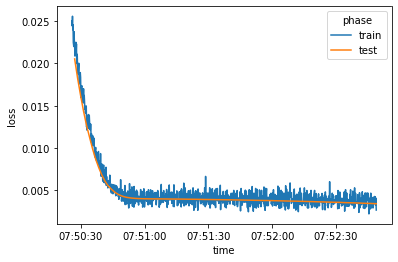

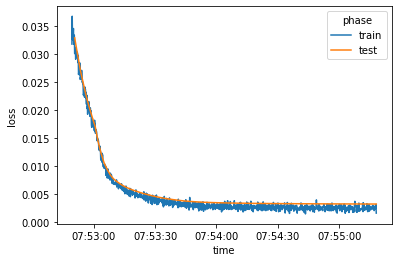

In [15]:
for i in range(10):
    plt.figure()
    sns.lineplot(data=losses_2_neg[i], x="time", y="loss", hue="phase")
    plt.show()

# Look at the convergence status of those loops

In [16]:
def create_pos_loop():
    pos_loop = biofuzznet.BioFuzzNet()

    pos_loop.add_fuzzy_node("A", "BIO")
    pos_loop.add_fuzzy_node("B", "BIO")
    pos_loop.add_fuzzy_node("C", "BIO")
    pos_loop.add_fuzzy_node("OR", "OR")

    pos_loop.add_transfer_edge("A", "OR")
    pos_loop.add_transfer_edge("B", "C")
    pos_loop.add_transfer_edge("C", "OR")
    pos_loop.add_simple_edge("OR", "B")
    return pos_loop

def create_neg_loop():
    neg_loop = biofuzznet.BioFuzzNet()

    neg_loop.add_fuzzy_node("A", "BIO")
    neg_loop.add_fuzzy_node("B", "BIO")
    neg_loop.add_fuzzy_node("C", "BIO")
    neg_loop.add_fuzzy_node("NOT", "NOT")
    neg_loop.add_fuzzy_node("AND", "AND")

    neg_loop.add_transfer_edge("A", "AND")
    neg_loop.add_transfer_edge("B", "C")
    neg_loop.add_transfer_edge("C", "NOT")
    neg_loop.add_simple_edge("NOT", "AND")
    neg_loop.add_simple_edge("AND", "B")
    return neg_loop

def plot_node_results(graph, states, node):
    for i in range(graph.output_states[node].size()[0]): # Ie for each cell
        sns.lineplot(x= [t for t in states.keys()], y = [states[t][node][i].detach().item() for t in states.keys()])
        plt.ylabel("Value at the node")
        plt.xlabel("Number of iterations through the loop")



In [17]:
# Check the convergence status of the simulated loops

def change_params(model, new_params_dict):
    for edge, params in new_params_dict.items():
        model.edges()[edge]["layer"].n = torch.nn.Parameter(torch.tensor(params[0]))
        model.edges()[edge]["layer"].K = torch.nn.Parameter(torch.tensor(params[1]))

def check_convergence_status(loop_type, params_list):
    if loop_type =="pos":
        loop = create_pos_loop()
    elif loop_type =="neg":
        loop = create_neg_loop()
    else:
        ValueError()
    for i in range(len(params_list)):
        change_params(loop, params_list[i][0])
        print("---------------------------------------")
        print(f"FOLD{i}")
        loop.initialise_random_truth_and_output(15)
        loop.set_network_ground_truth({"A":torch.rand(15), "B":torch.rand(15), "C":torch.rand(15)})
        for node in loop.biological_nodes:
            loop.nodes()[node]["output_state"] = loop.nodes()[node]["ground_truth"] 
        states_negative = loop.sequential_update(["A"], convergence_check = True)
        for node in ["B"]:
            plot_node_results(loop, states_negative, node)
            plt.show()
        print("------------------------------------------")
        


---------------------------------------
FOLD0


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


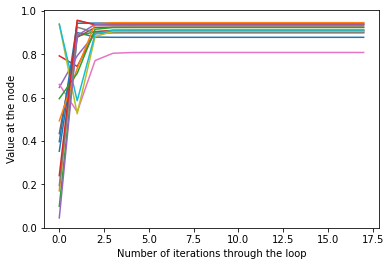

------------------------------------------
---------------------------------------
FOLD1


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


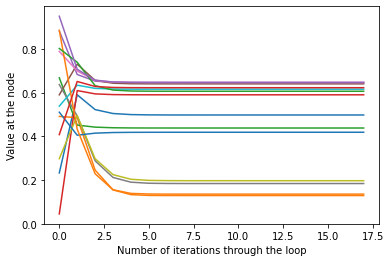

------------------------------------------
---------------------------------------
FOLD2


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


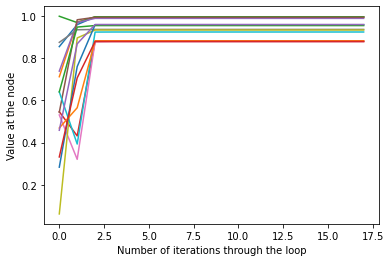

------------------------------------------
---------------------------------------
FOLD3


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


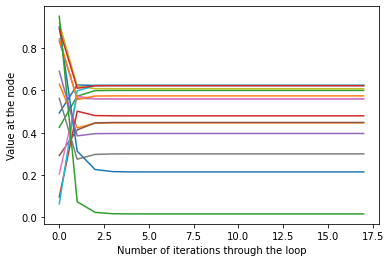

------------------------------------------
---------------------------------------
FOLD4


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


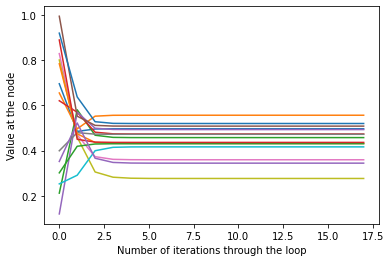

------------------------------------------
---------------------------------------
FOLD5


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


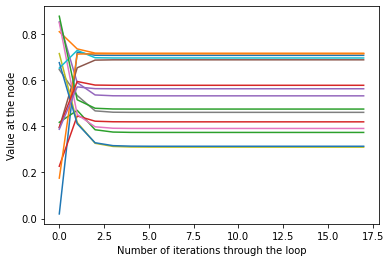

------------------------------------------
---------------------------------------
FOLD6


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


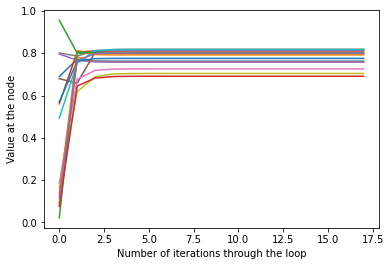

------------------------------------------
---------------------------------------
FOLD7


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


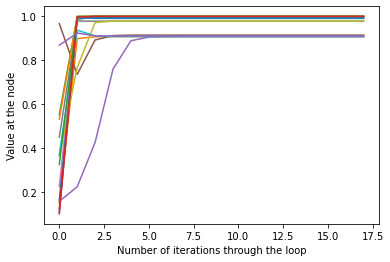

------------------------------------------
---------------------------------------
FOLD8


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


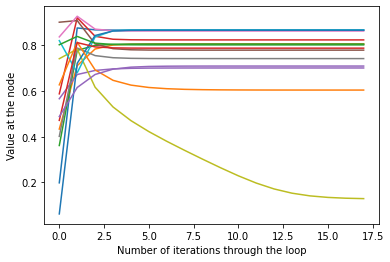

------------------------------------------
---------------------------------------
FOLD9


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


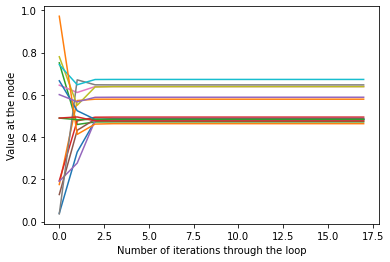

------------------------------------------
---------------------------------------
FOLD10


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


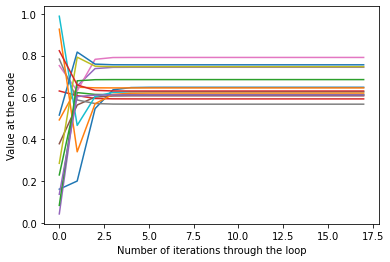

------------------------------------------
---------------------------------------
FOLD11


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


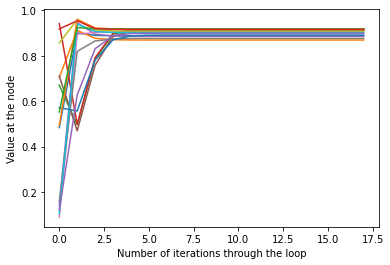

------------------------------------------
---------------------------------------
FOLD12


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


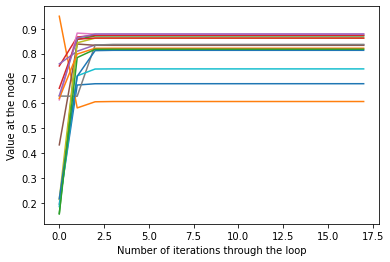

------------------------------------------
---------------------------------------
FOLD13


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


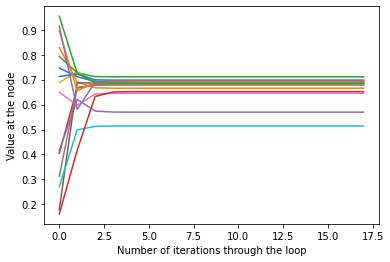

------------------------------------------
---------------------------------------
FOLD14


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


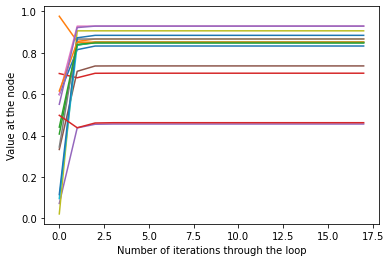

------------------------------------------
---------------------------------------
FOLD15


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


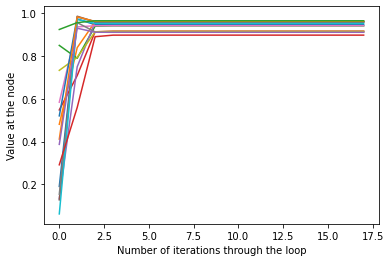

------------------------------------------
---------------------------------------
FOLD16


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


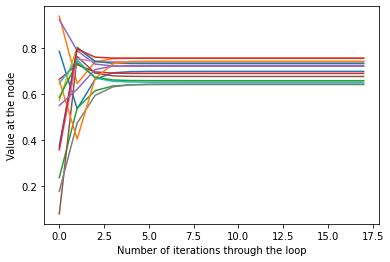

------------------------------------------
---------------------------------------
FOLD17


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


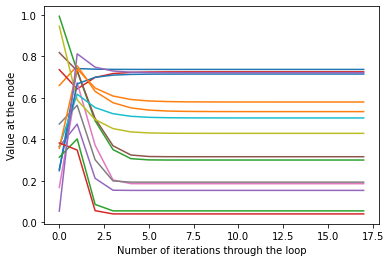

------------------------------------------
---------------------------------------
FOLD18


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


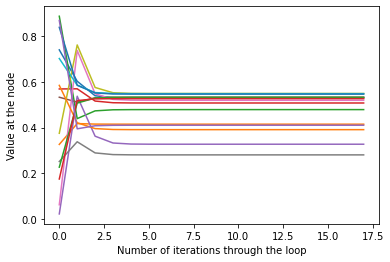

------------------------------------------
---------------------------------------
FOLD19


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


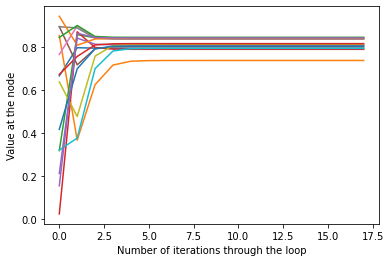

------------------------------------------
---------------------------------------
FOLD20


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


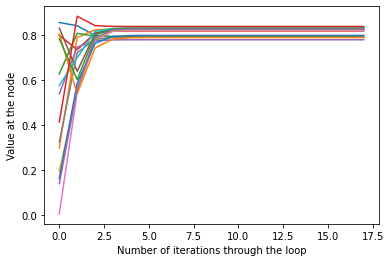

------------------------------------------
---------------------------------------
FOLD21


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


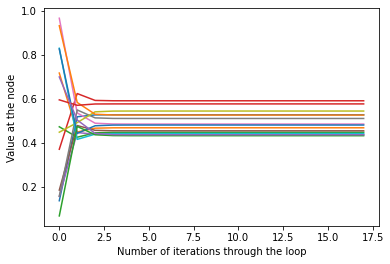

------------------------------------------
---------------------------------------
FOLD22


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


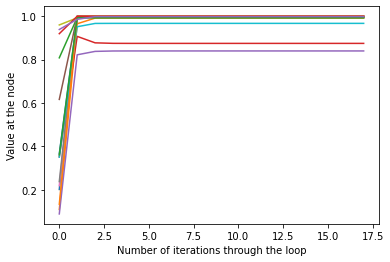

------------------------------------------
---------------------------------------
FOLD23


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


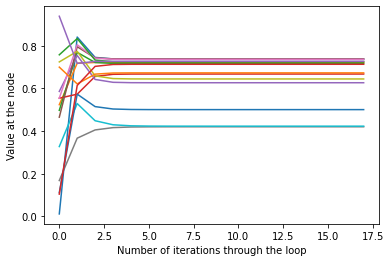

------------------------------------------
---------------------------------------
FOLD24


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


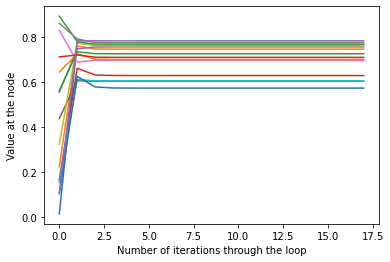

------------------------------------------
---------------------------------------
FOLD25


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


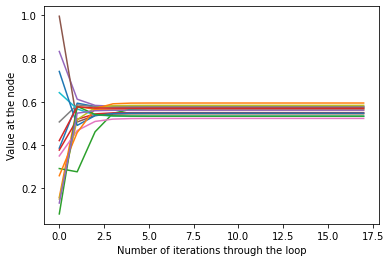

------------------------------------------
---------------------------------------
FOLD26


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


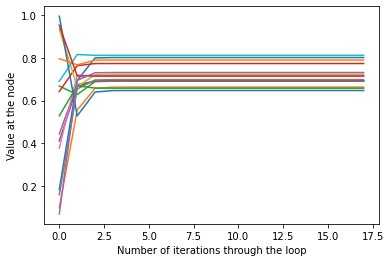

------------------------------------------
---------------------------------------
FOLD27


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


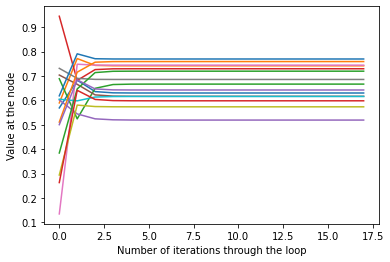

------------------------------------------
---------------------------------------
FOLD28


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


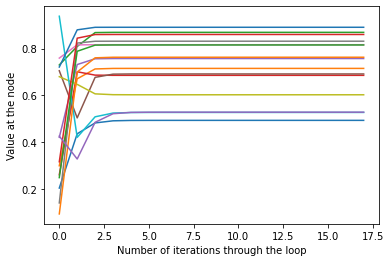

------------------------------------------
---------------------------------------
FOLD29


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


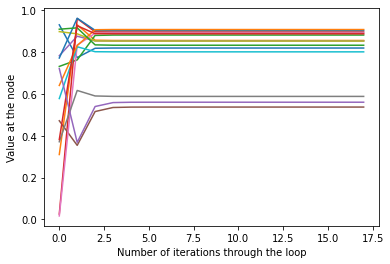

------------------------------------------
---------------------------------------
FOLD30


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


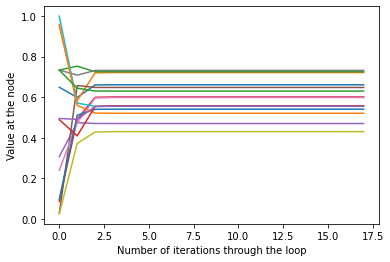

------------------------------------------
---------------------------------------
FOLD31


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


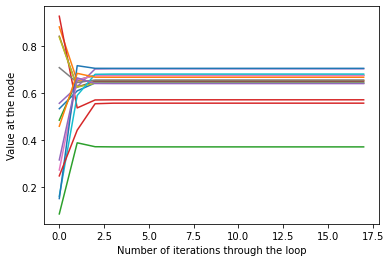

------------------------------------------
---------------------------------------
FOLD32


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


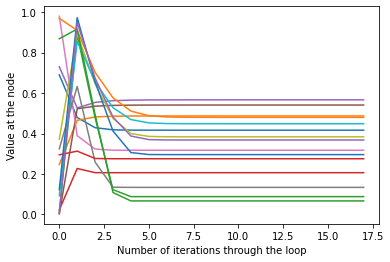

------------------------------------------
---------------------------------------
FOLD33


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


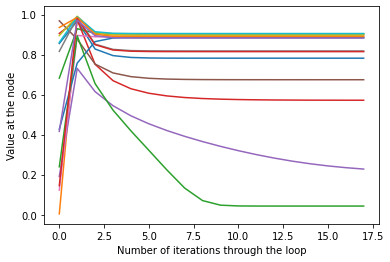

------------------------------------------
---------------------------------------
FOLD34


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


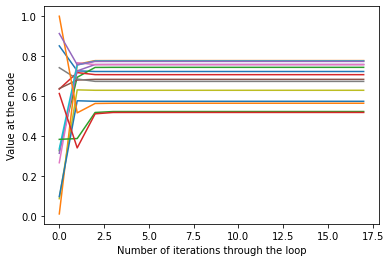

------------------------------------------
---------------------------------------
FOLD35


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


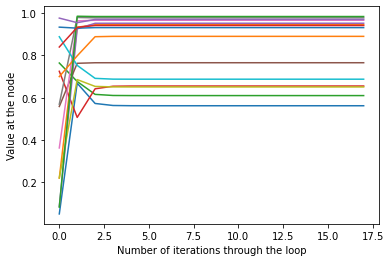

------------------------------------------
---------------------------------------
FOLD36


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


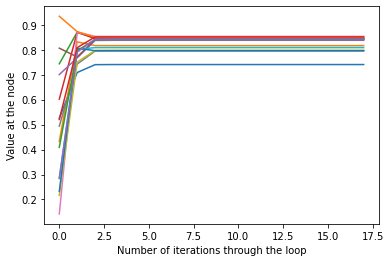

------------------------------------------
---------------------------------------
FOLD37


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


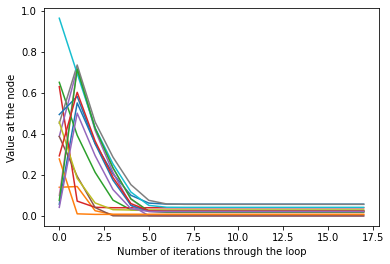

------------------------------------------
---------------------------------------
FOLD38


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


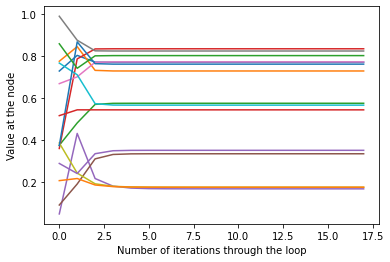

------------------------------------------
---------------------------------------
FOLD39


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


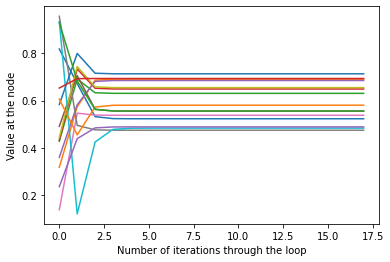

------------------------------------------
---------------------------------------
FOLD40


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


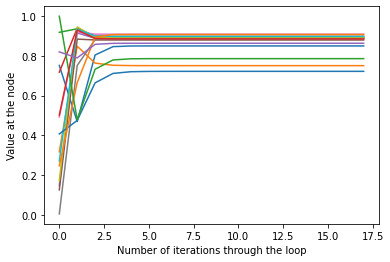

------------------------------------------
---------------------------------------
FOLD41


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


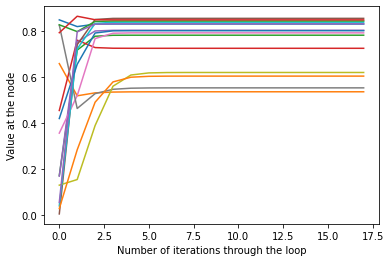

------------------------------------------
---------------------------------------
FOLD42


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


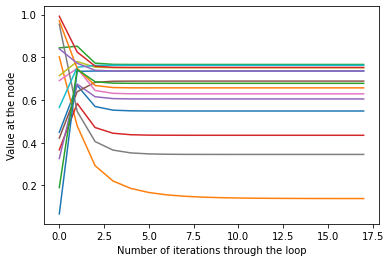

------------------------------------------
---------------------------------------
FOLD43


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


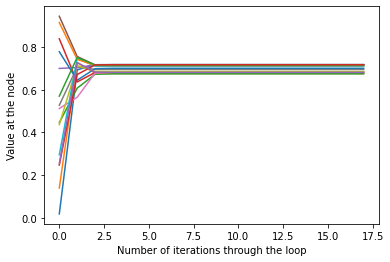

------------------------------------------
---------------------------------------
FOLD44


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


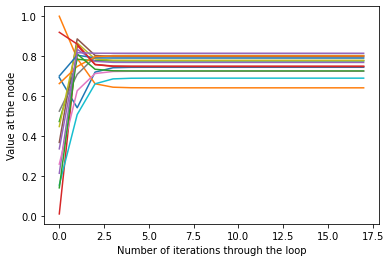

------------------------------------------
---------------------------------------
FOLD45


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


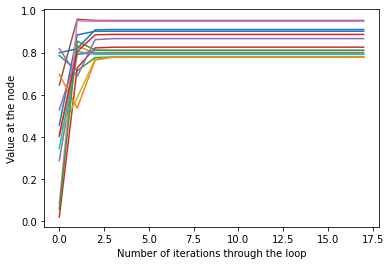

------------------------------------------
---------------------------------------
FOLD46


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


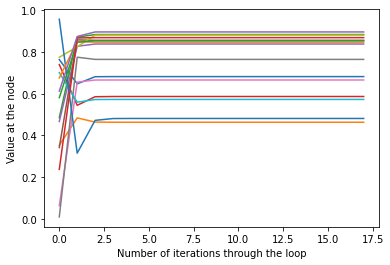

------------------------------------------
---------------------------------------
FOLD47


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


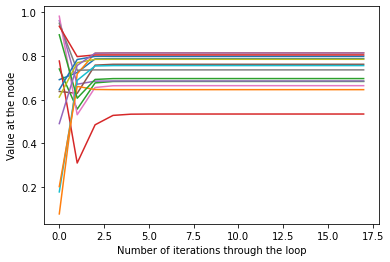

------------------------------------------
---------------------------------------
FOLD48


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


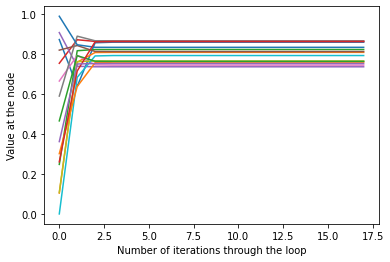

------------------------------------------
---------------------------------------
FOLD49


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


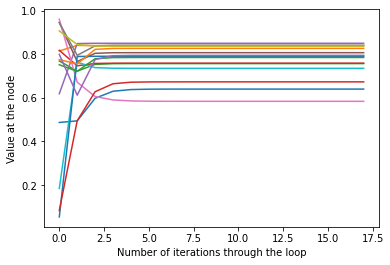

------------------------------------------


In [18]:
check_convergence_status("pos", params_truth_1_pos )

In [19]:
plt.close("all")

Positive loop
Bistable loops:
    Fold 6 though not fully converged
    Fold 21
    Fold 38
    Fold 39
    Fold 41
    
Negative loop
Oscillatory loops:
    Fold 30 though it may be slowly dampening
    Fold 37 which is fully oscillatory
    Fold 41

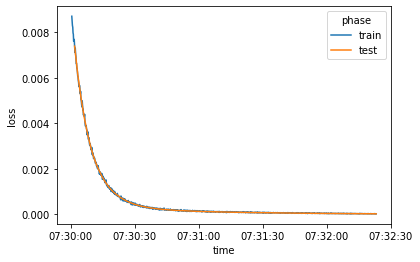

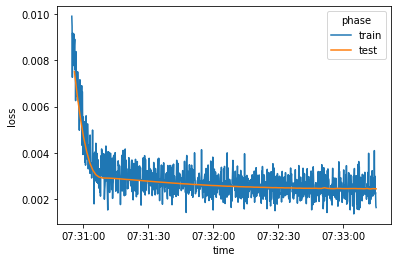

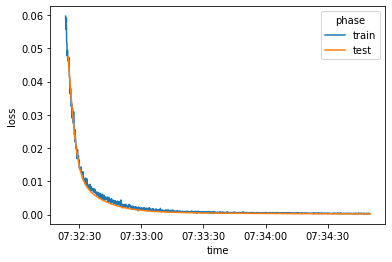

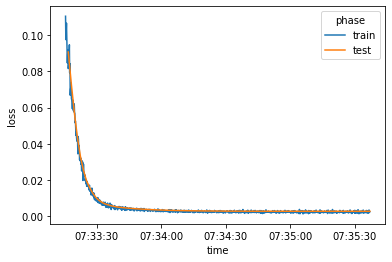

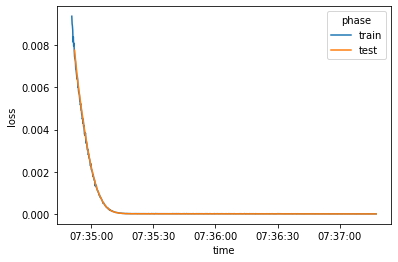

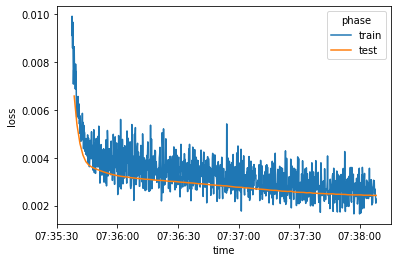

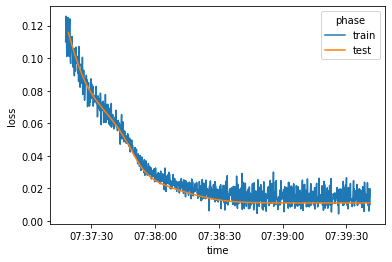

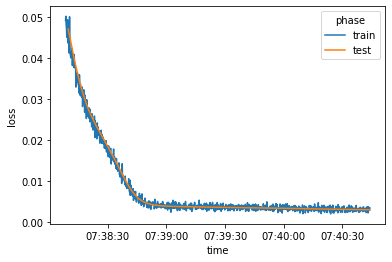

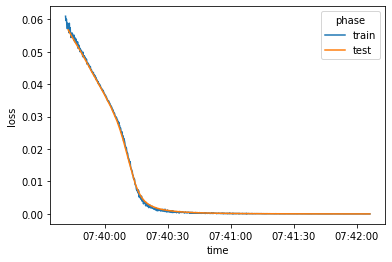

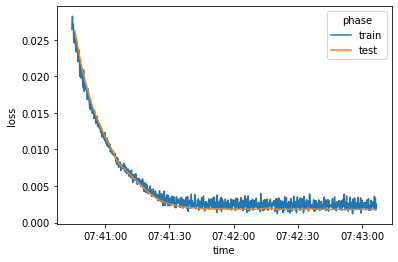

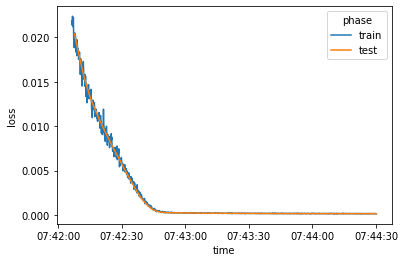

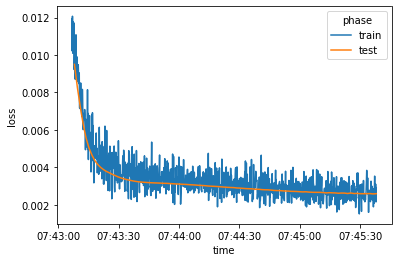

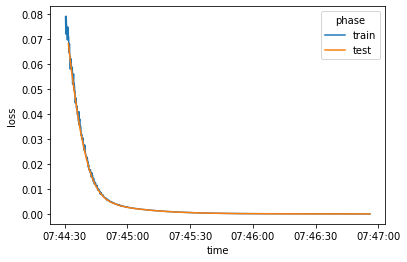

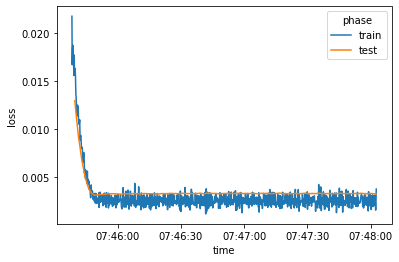

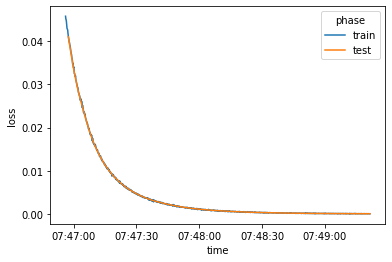

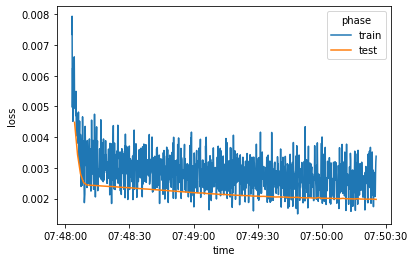

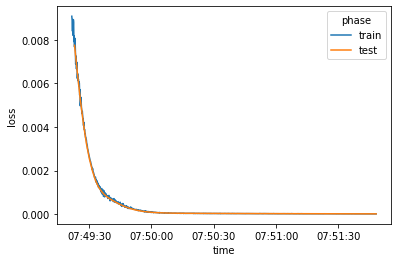

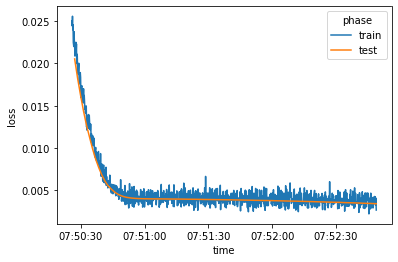

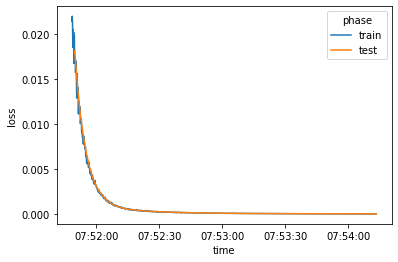

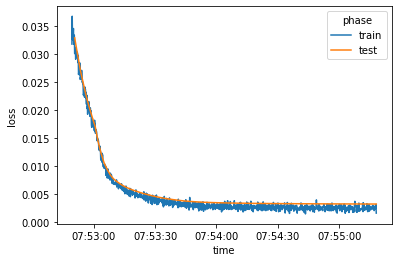

In [20]:
for i in range(10):
    loss = losses_1_neg[i]
    lossbis = losses_2_neg[i]
    sns.lineplot(data=loss, x="time", y="loss", hue="phase")
    plt.show()
    plt.figure()
    sns.lineplot(data=lossbis, x="time", y="loss", hue="phase")
    plt.show()

In [21]:
plt.close("all")

In [32]:
def plot_model(pred, truth, nodes):
    ident = np.linspace(0,1,100)
    plt.figure()
    for node in nodes:
        plt.scatter( truth[node].detach(),pred[node].detach(),label = node)
    plt.plot(ident, ident, "k--", alpha = 0.25)
    plt.xlabel("True value")
    plt.ylabel("Predicted value")
    plt.legend()
    plt.show()
    

--------------FOLD 0 --------------


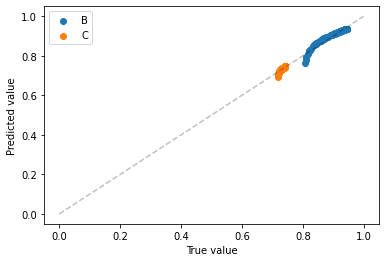

--------------FOLD 1 --------------


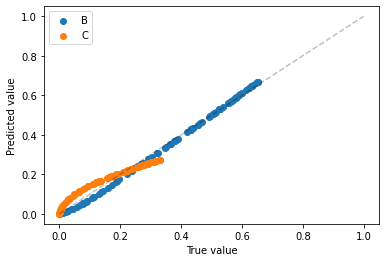

--------------FOLD 2 --------------


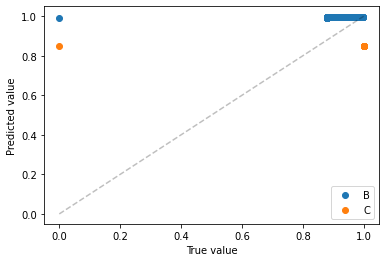

--------------FOLD 3 --------------


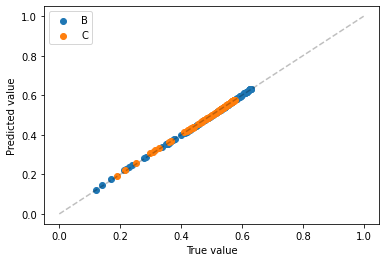

--------------FOLD 4 --------------


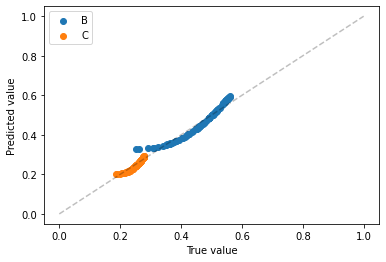

--------------FOLD 5 --------------


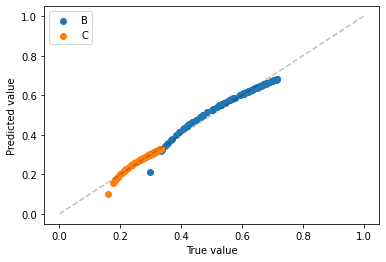

--------------FOLD 6 --------------


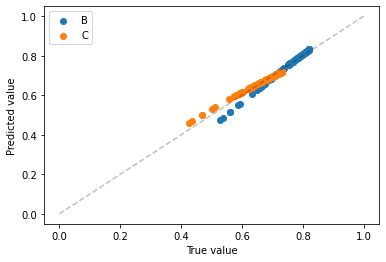

--------------FOLD 7 --------------


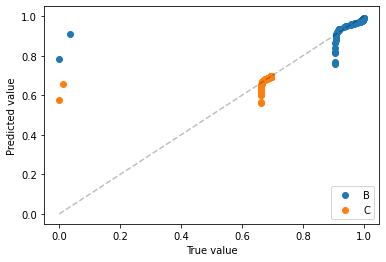

--------------FOLD 8 --------------


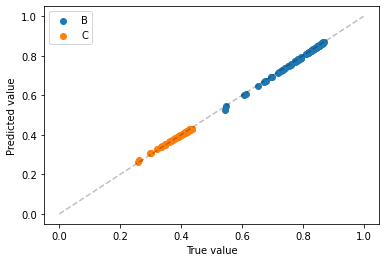

--------------FOLD 9 --------------


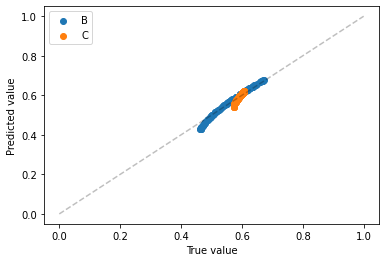

--------------FOLD 10 --------------


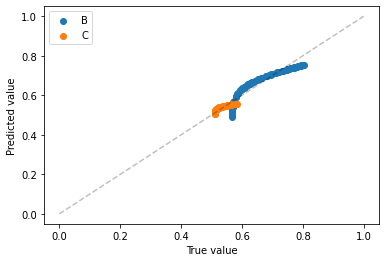

--------------FOLD 11 --------------


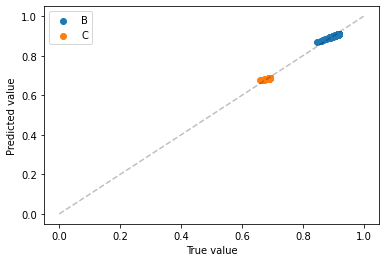

--------------FOLD 12 --------------


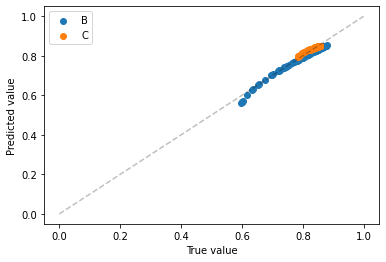

--------------FOLD 13 --------------


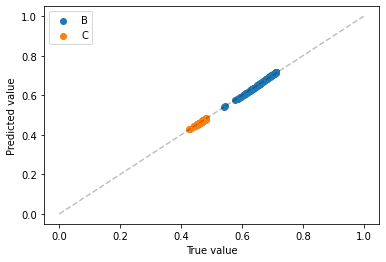

--------------FOLD 14 --------------


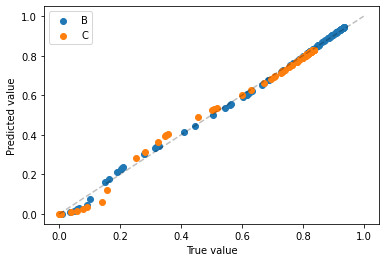

--------------FOLD 15 --------------


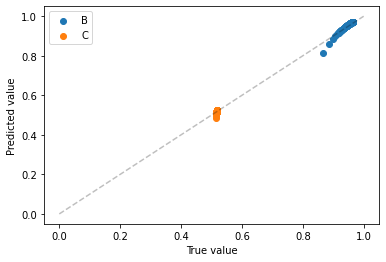

--------------FOLD 16 --------------


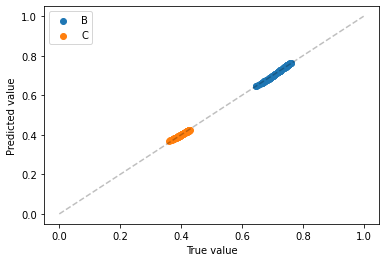

--------------FOLD 17 --------------


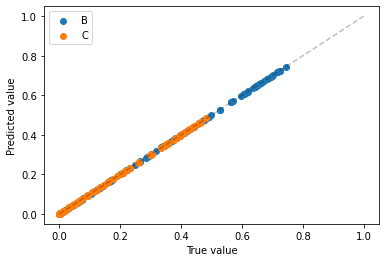

--------------FOLD 18 --------------


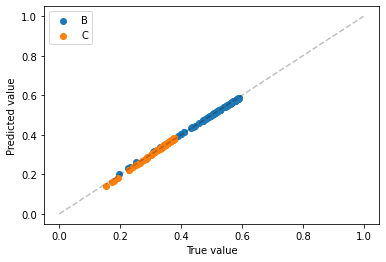

--------------FOLD 19 --------------


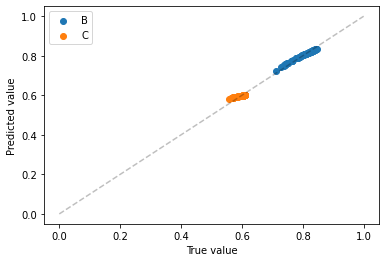

--------------FOLD 20 --------------


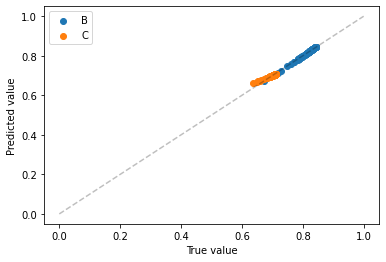

--------------FOLD 21 --------------


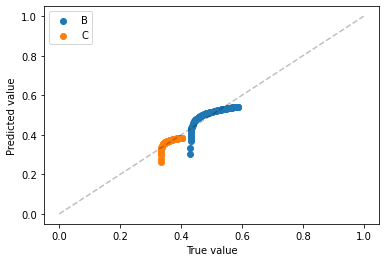

--------------FOLD 22 --------------


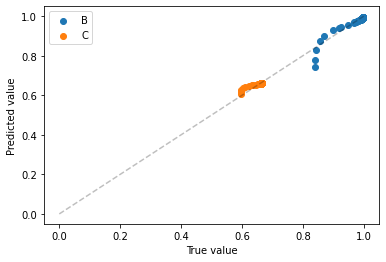

--------------FOLD 23 --------------


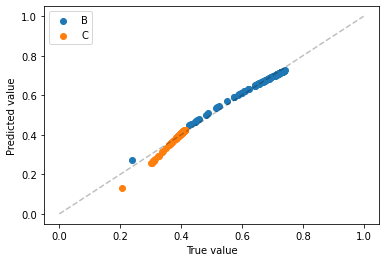

--------------FOLD 24 --------------


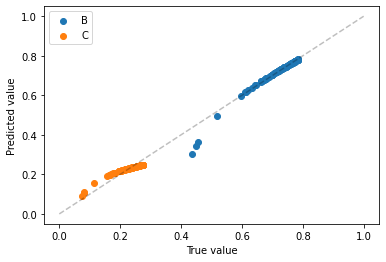

--------------FOLD 25 --------------


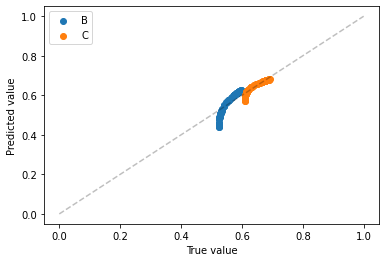

--------------FOLD 26 --------------


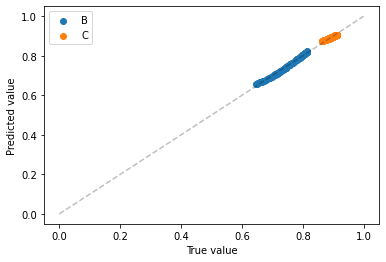

--------------FOLD 27 --------------


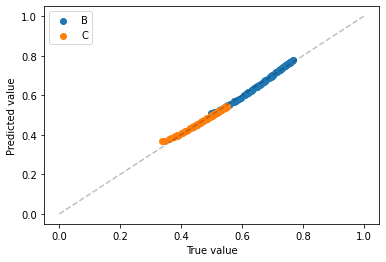

--------------FOLD 28 --------------


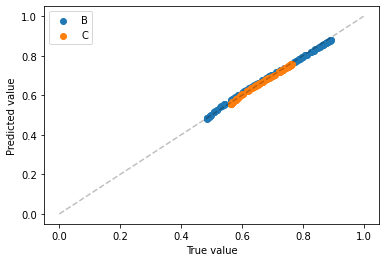

--------------FOLD 29 --------------


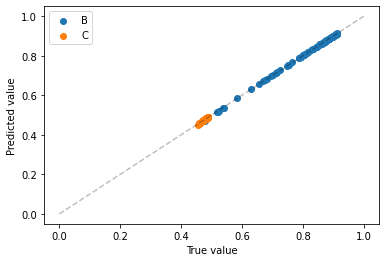

--------------FOLD 30 --------------


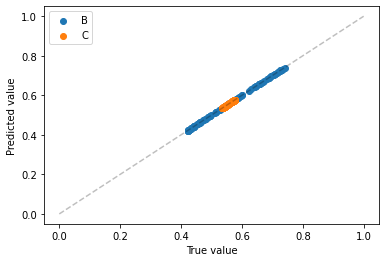

--------------FOLD 31 --------------


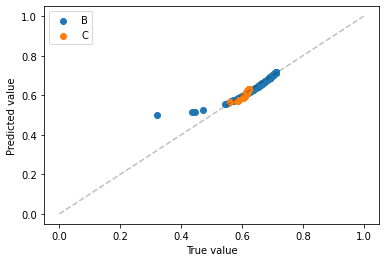

--------------FOLD 32 --------------


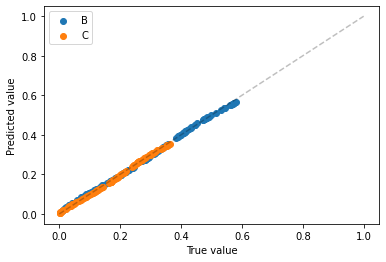

--------------FOLD 33 --------------


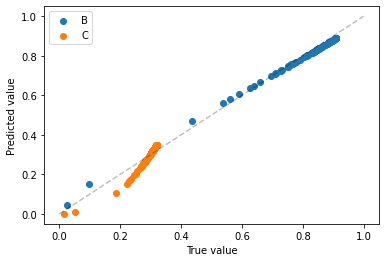

--------------FOLD 34 --------------


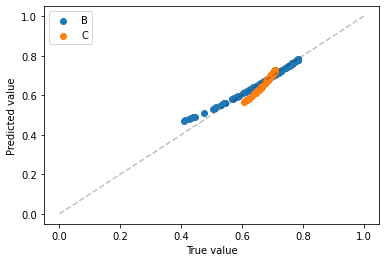

--------------FOLD 35 --------------


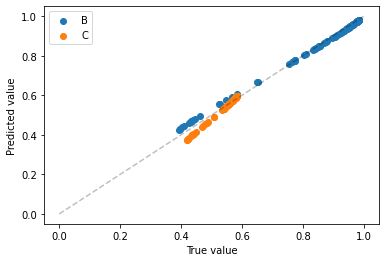

--------------FOLD 36 --------------


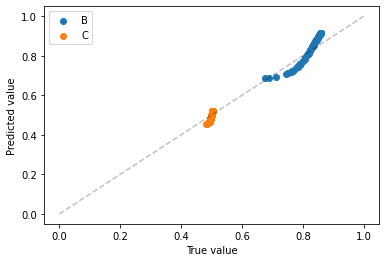

--------------FOLD 37 --------------


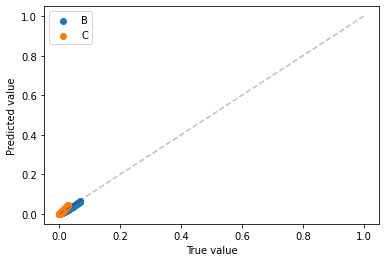

--------------FOLD 38 --------------


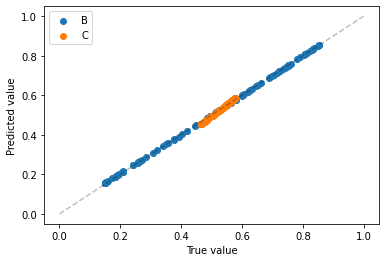

--------------FOLD 39 --------------


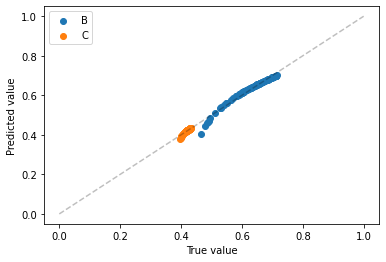

--------------FOLD 40 --------------


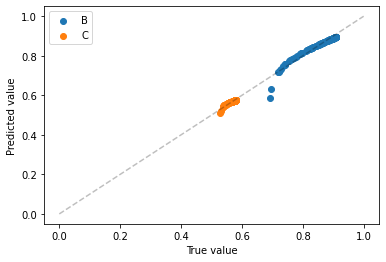

--------------FOLD 41 --------------


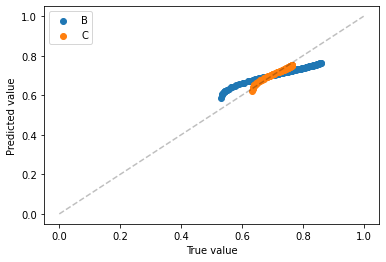

--------------FOLD 42 --------------


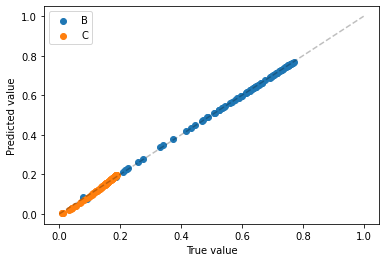

--------------FOLD 43 --------------


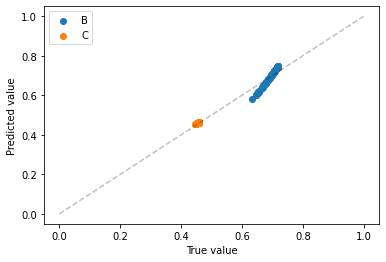

--------------FOLD 44 --------------


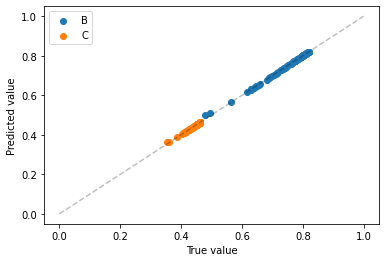

--------------FOLD 45 --------------


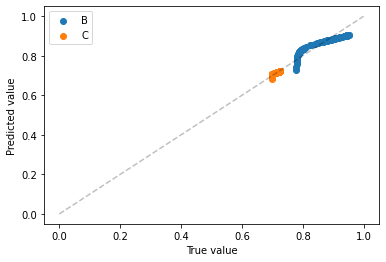

--------------FOLD 46 --------------


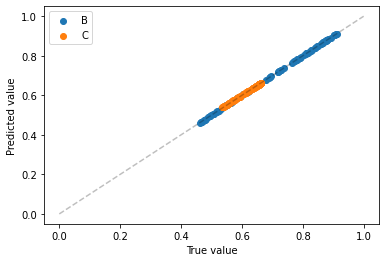

--------------FOLD 47 --------------


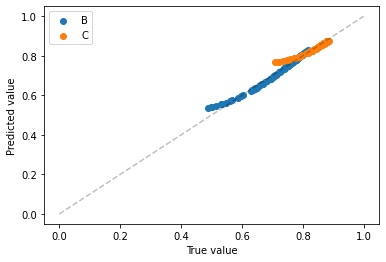

--------------FOLD 48 --------------


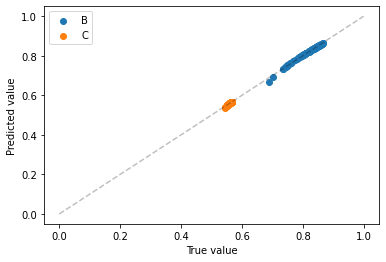

--------------FOLD 49 --------------


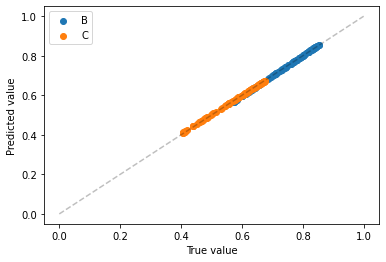

In [33]:
for i in range(50):
    print(f"--------------FOLD {i} --------------")
    plot_model(test_pred_1_pos[i], truth=test_truth_1_pos[i], nodes = ["B", "C"])

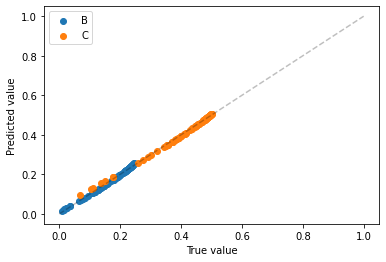

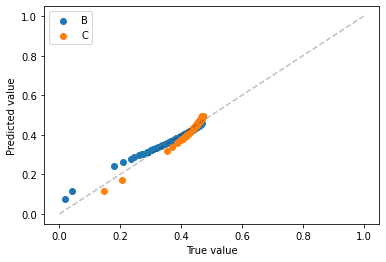

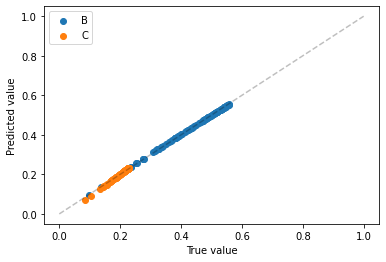

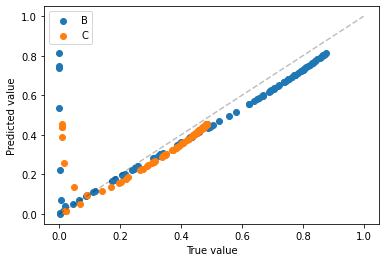

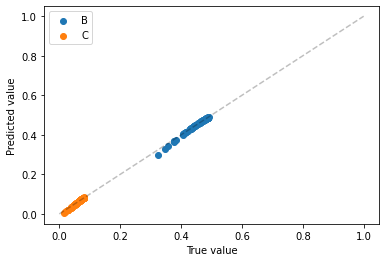

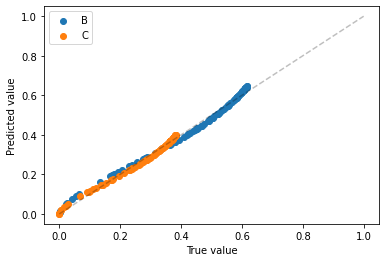

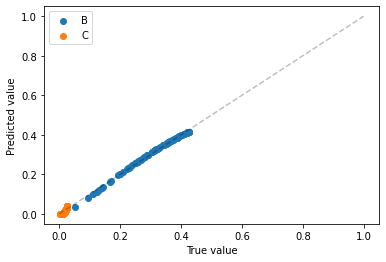

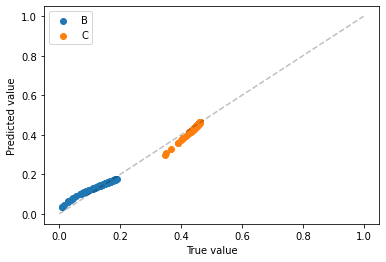

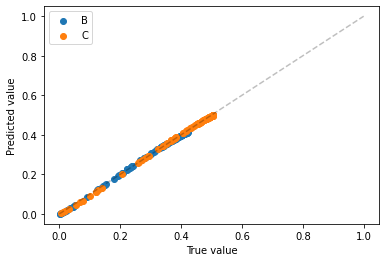

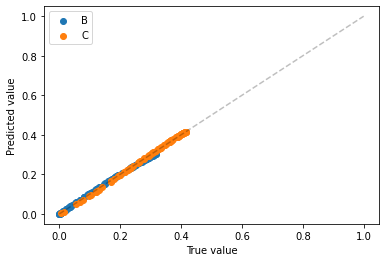

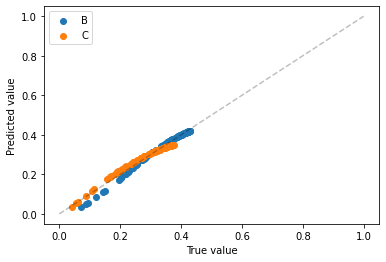

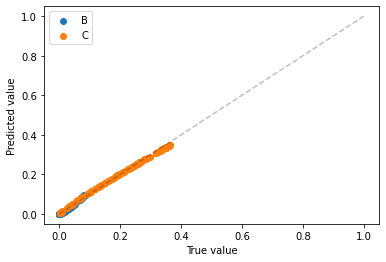

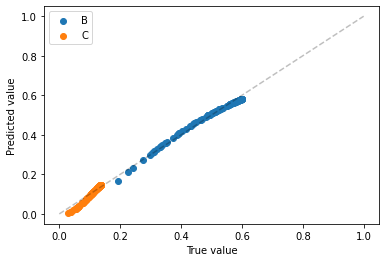

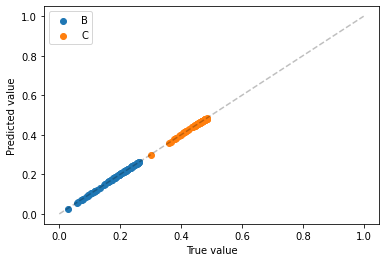

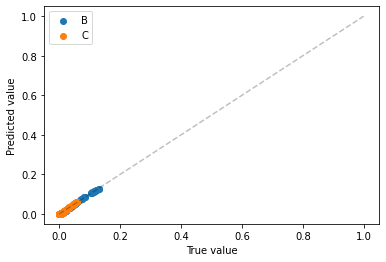

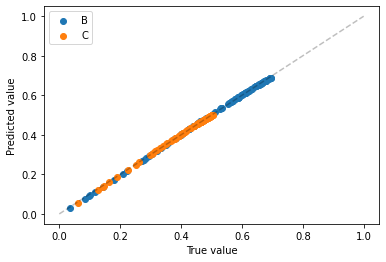

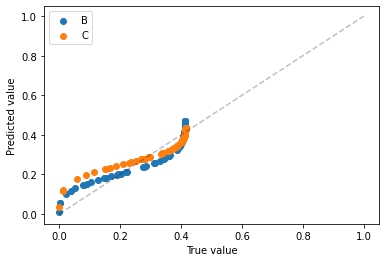

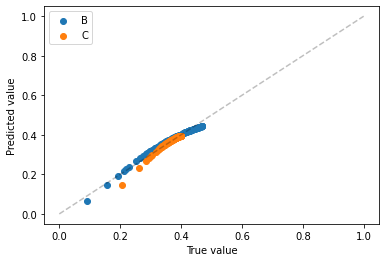

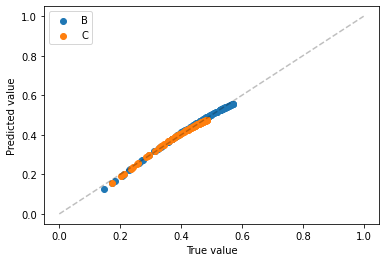

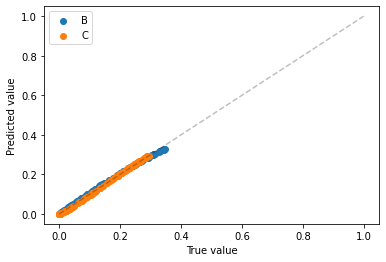

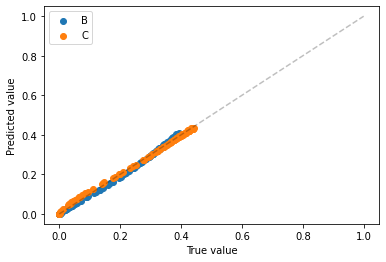

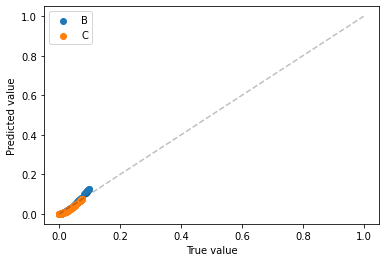

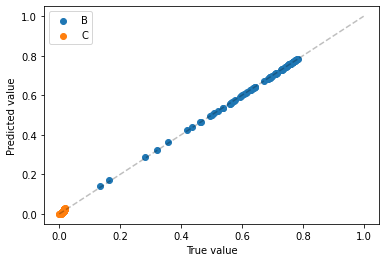

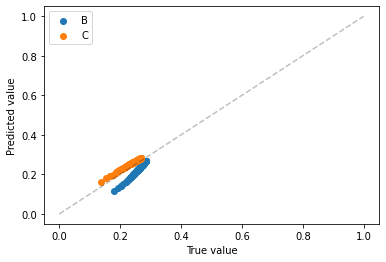

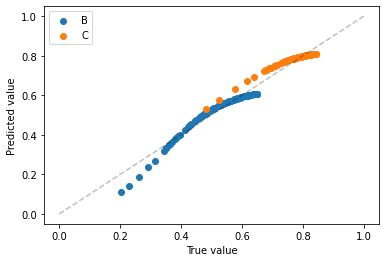

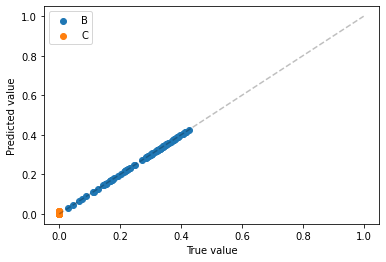

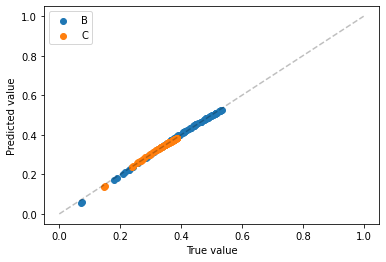

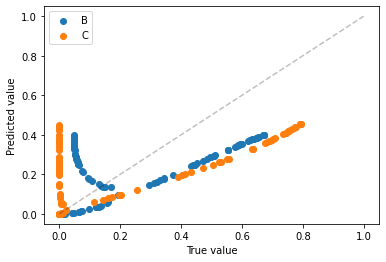

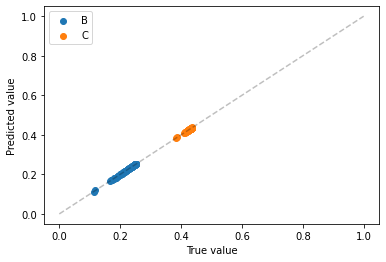

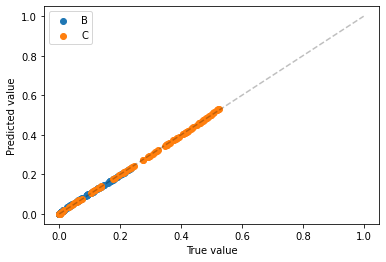

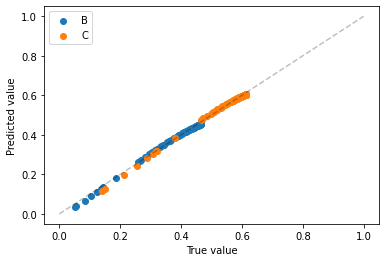

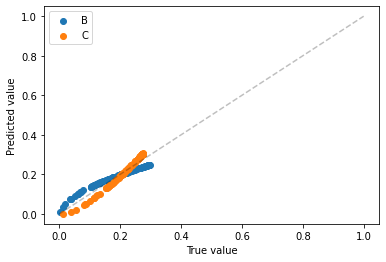

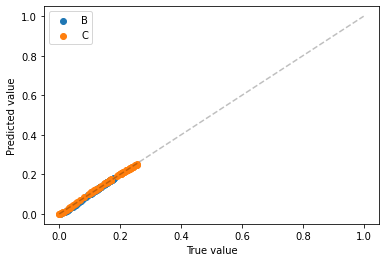

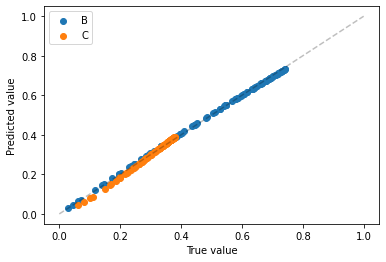

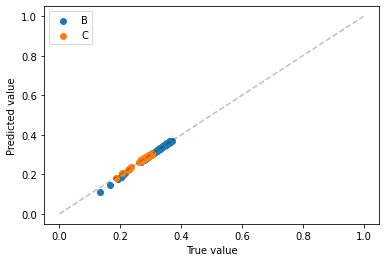

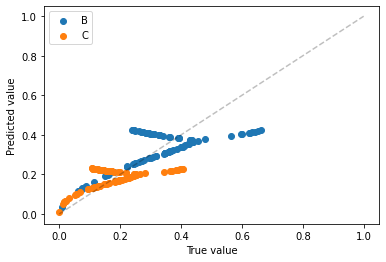

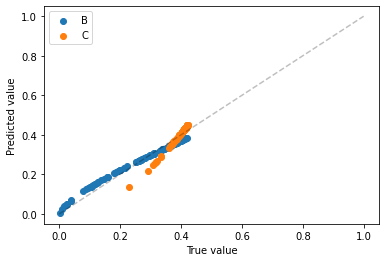

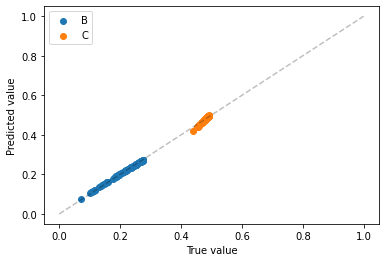

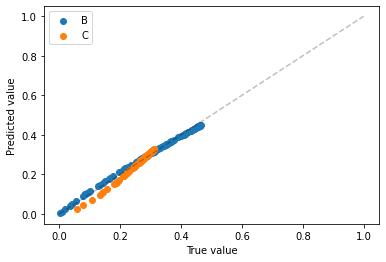

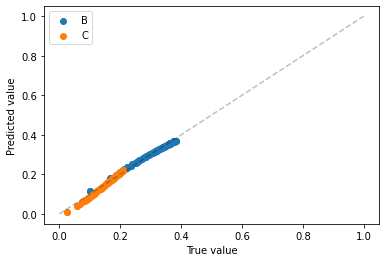

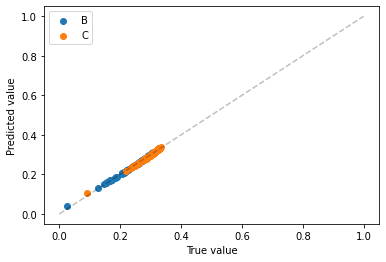

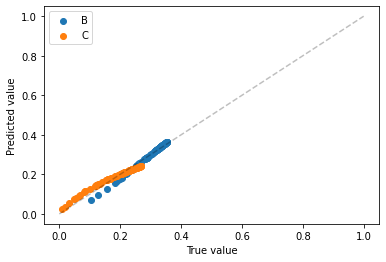

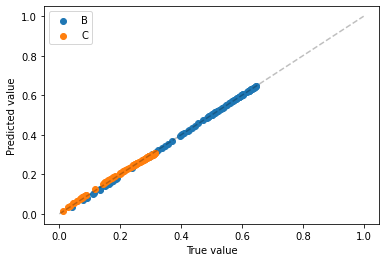

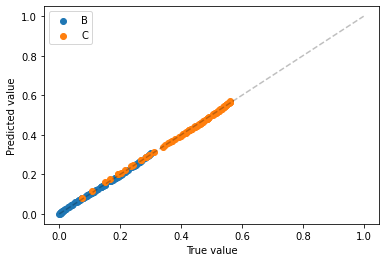

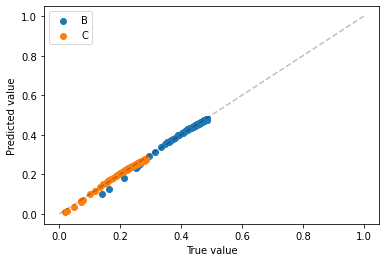

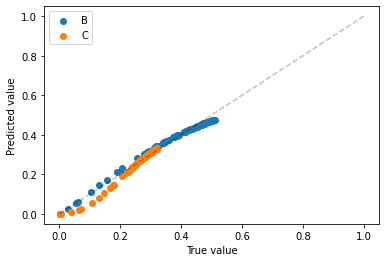

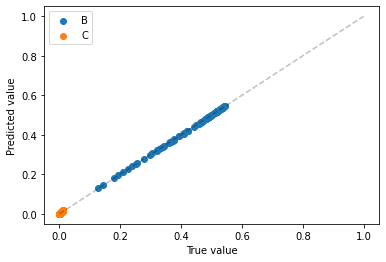

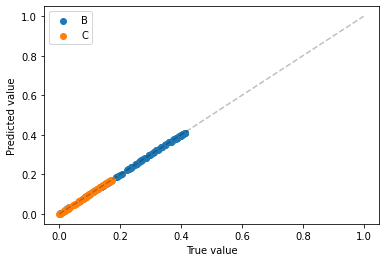

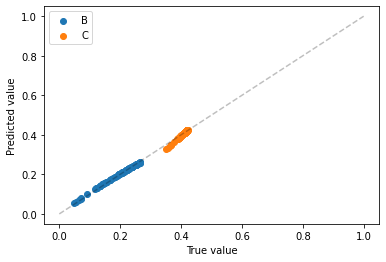

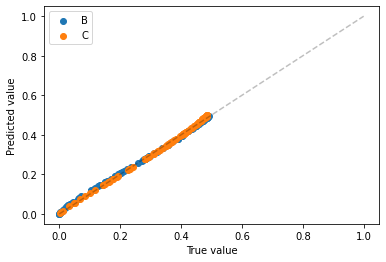

In [34]:
for i in range(50):
    plot_model(test_pred_1_neg[i], truth=test_truth_1_neg[i], nodes = ["B", "C"])

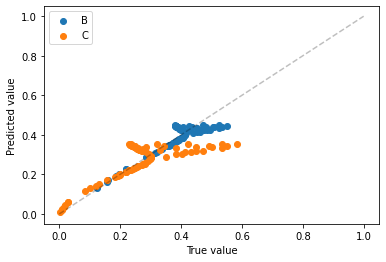

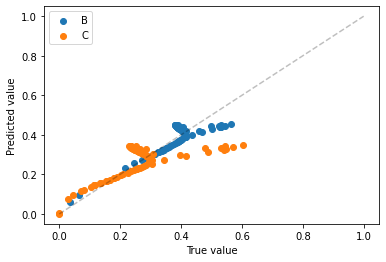

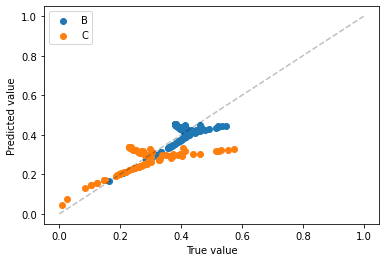

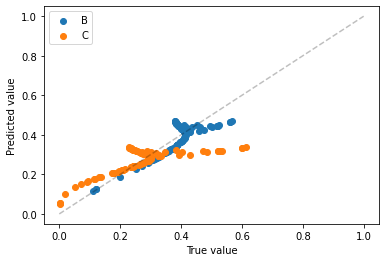

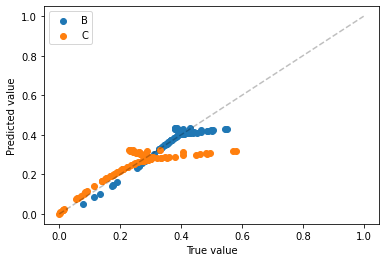

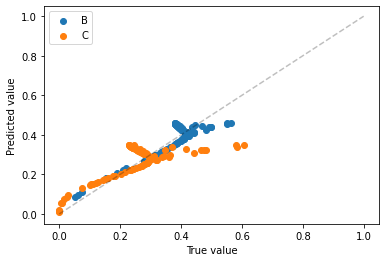

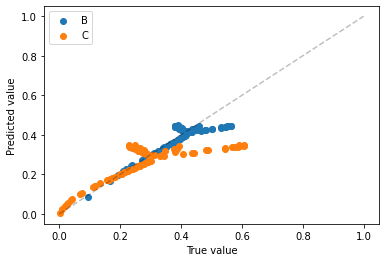

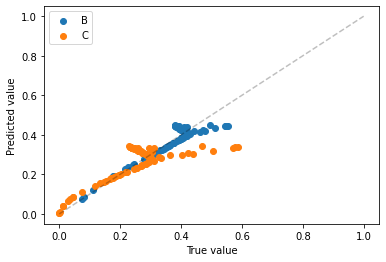

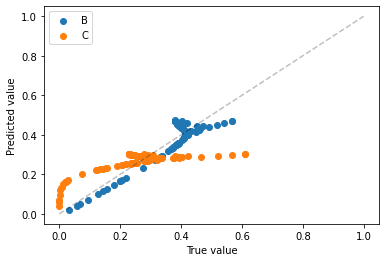

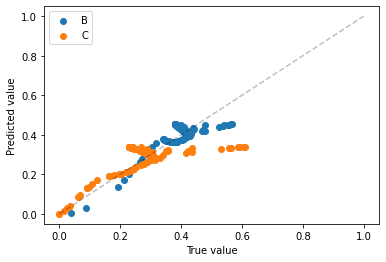

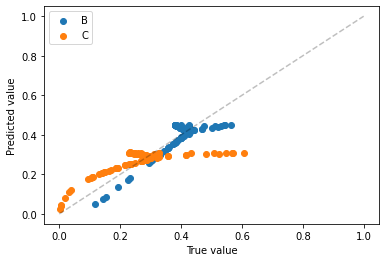

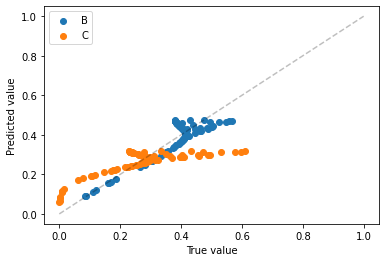

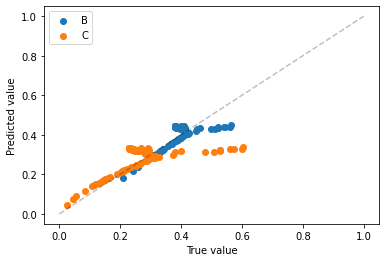

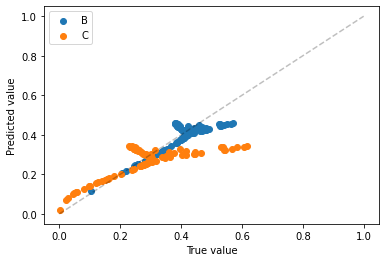

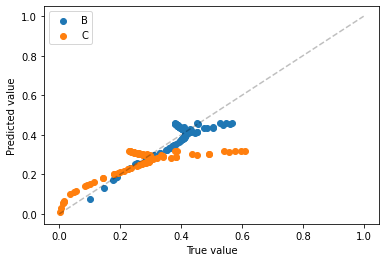

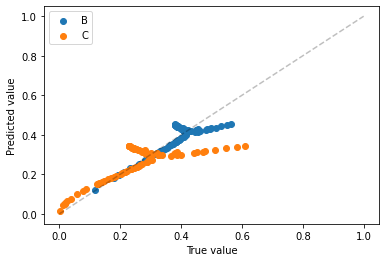

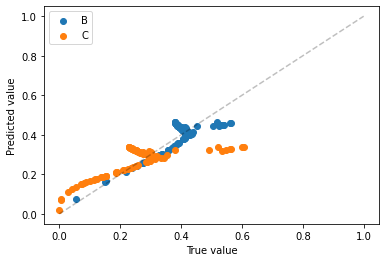

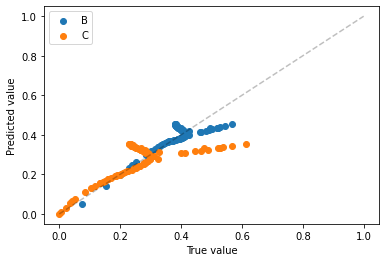

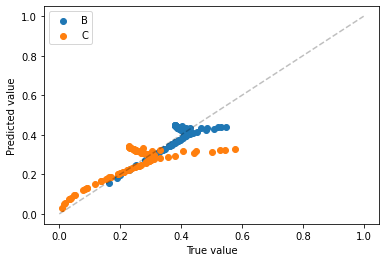

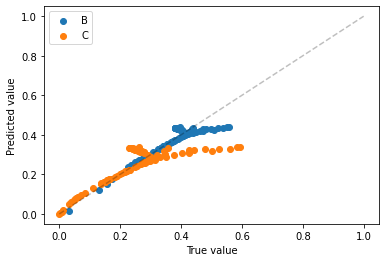

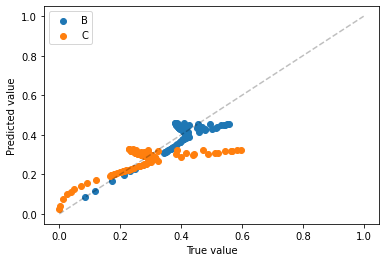

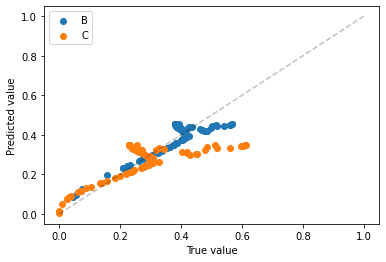

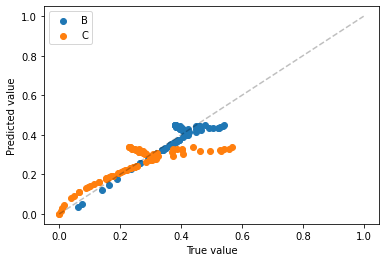

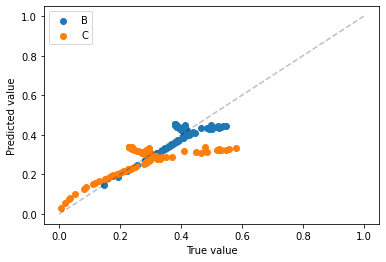

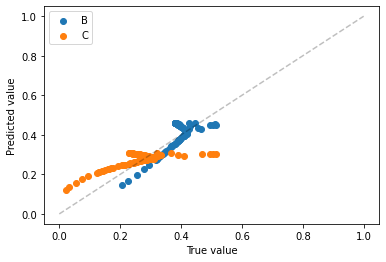

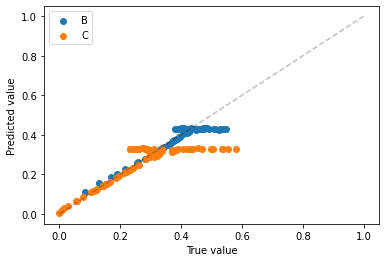

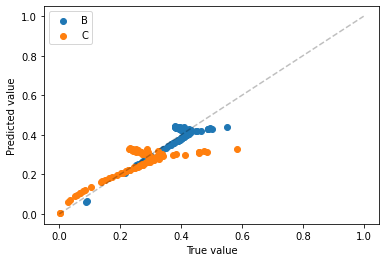

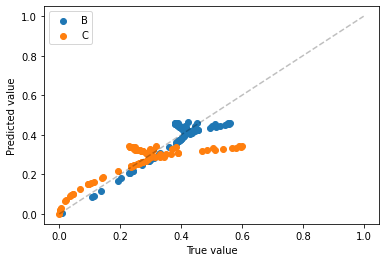

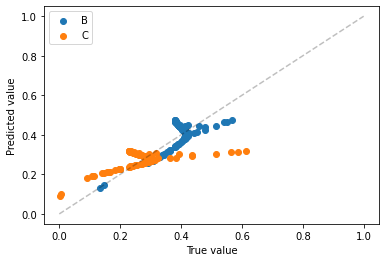

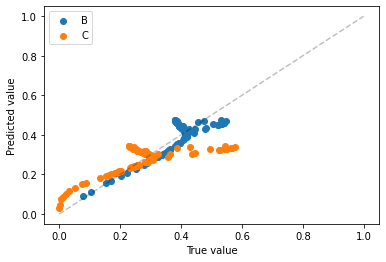

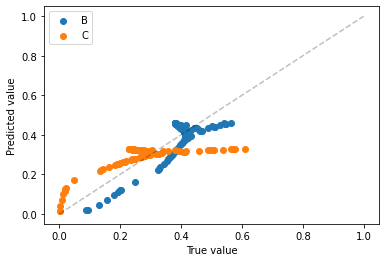

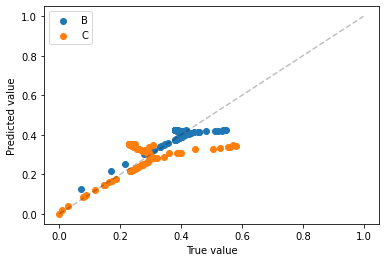

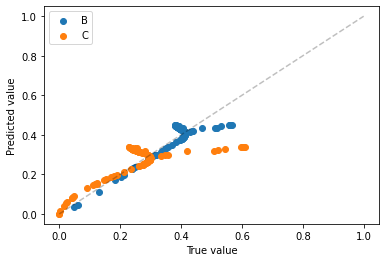

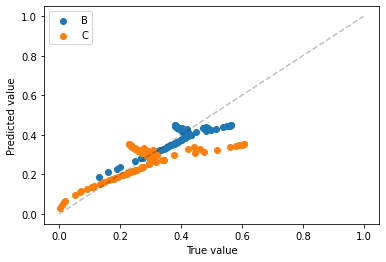

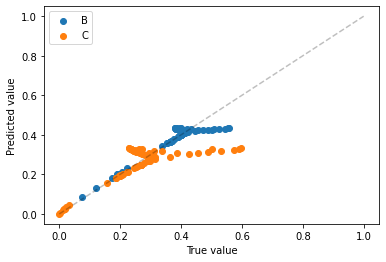

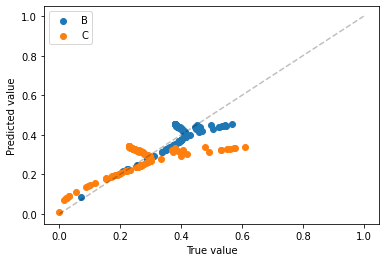

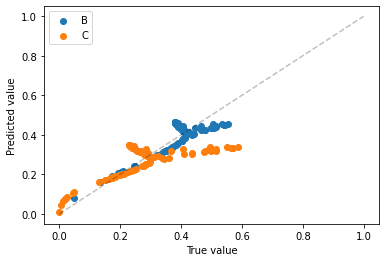

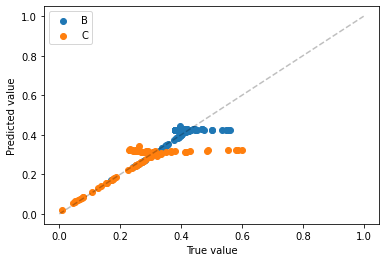

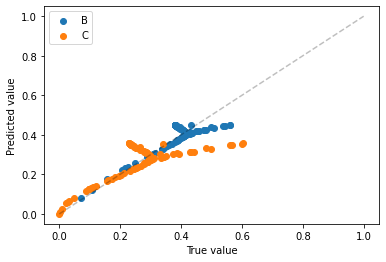

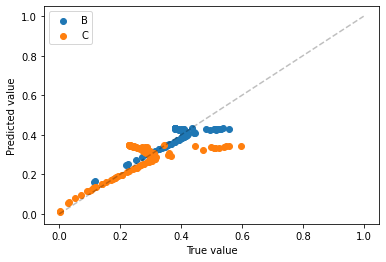

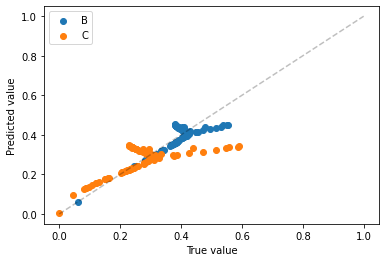

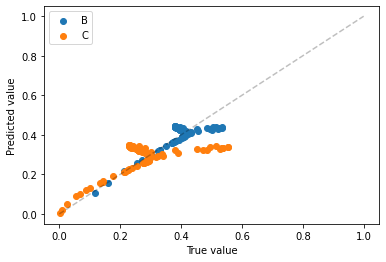

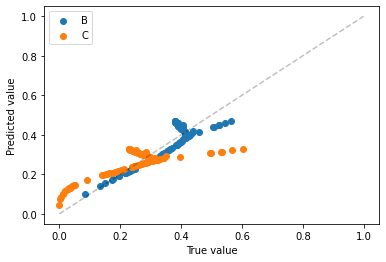

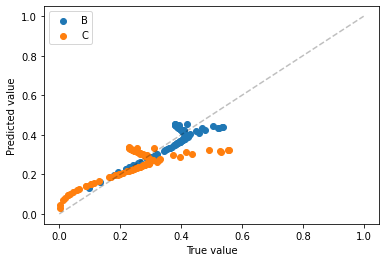

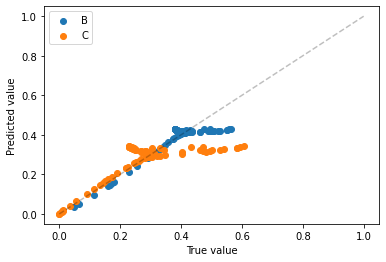

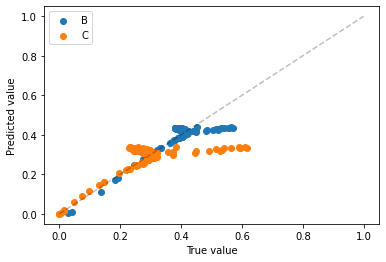

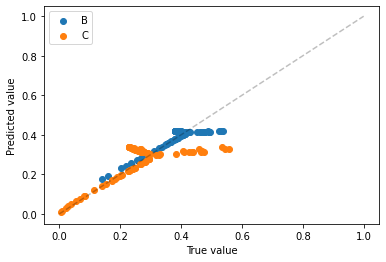

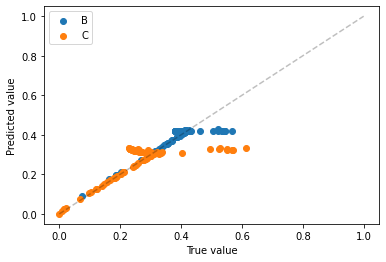

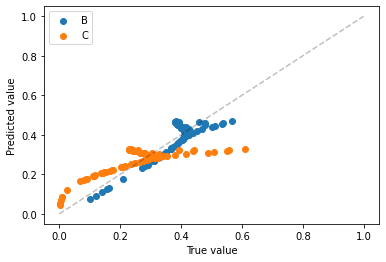

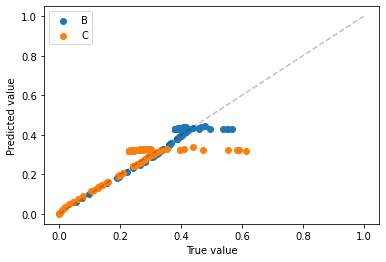

In [35]:
#Oscillatory loop
for i in range(50):
    plot_model(test_pred_2_neg[i], truth=test_truth_2_neg[i], nodes = ["B", "C"])

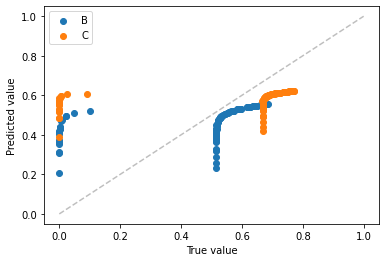

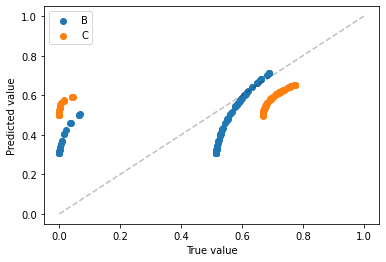

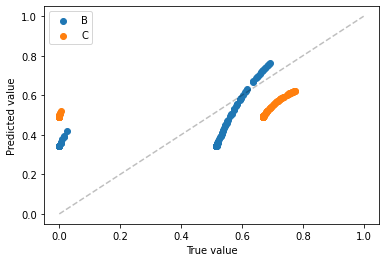

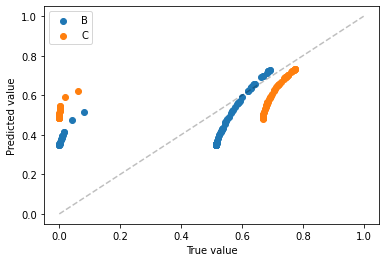

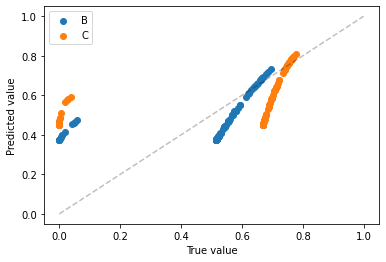

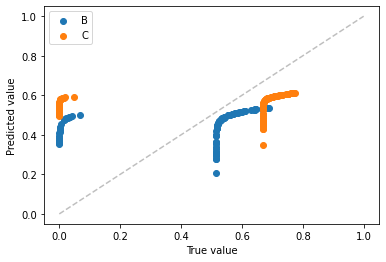

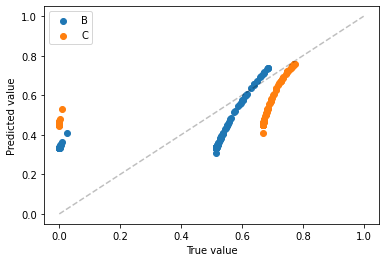

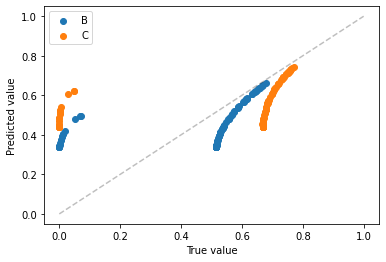

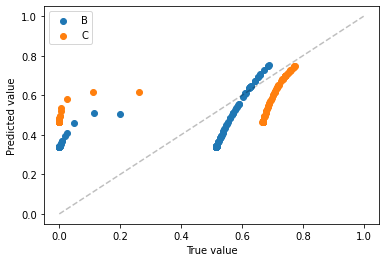

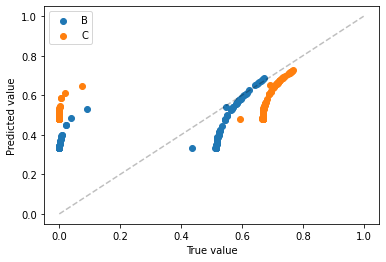

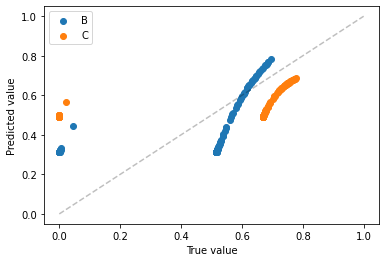

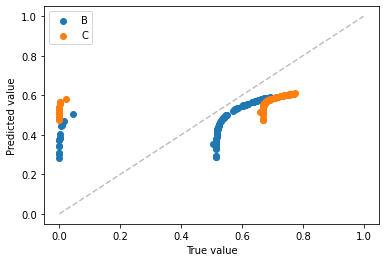

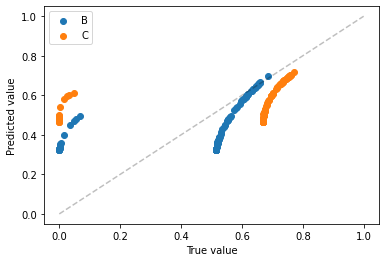

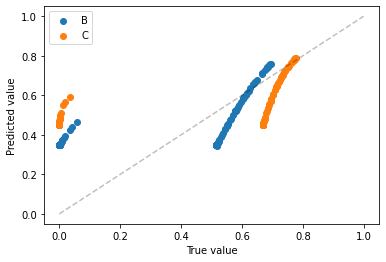

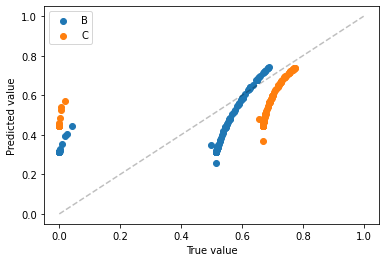

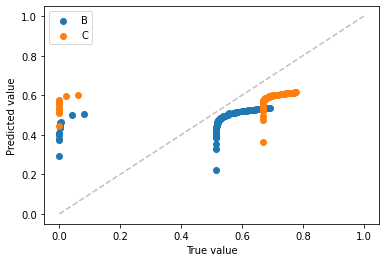

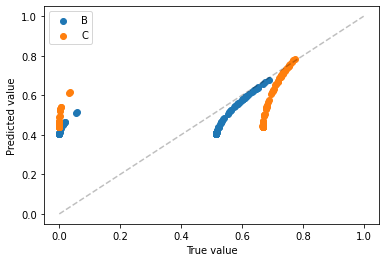

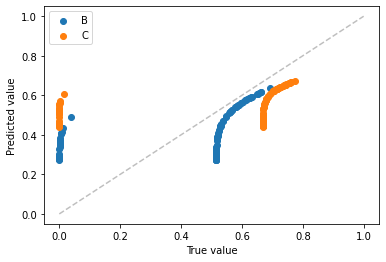

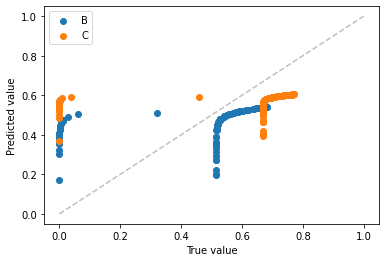

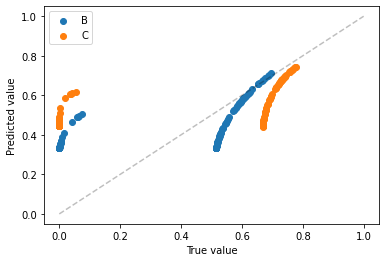

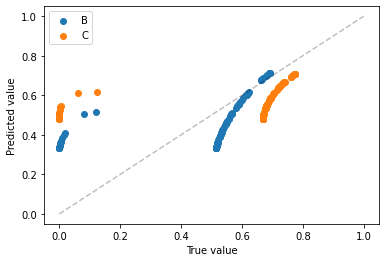

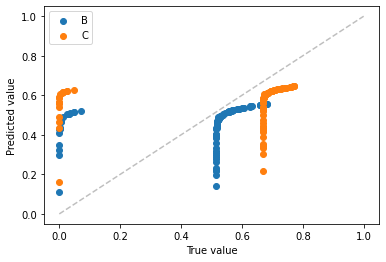

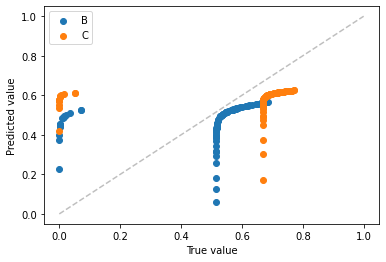

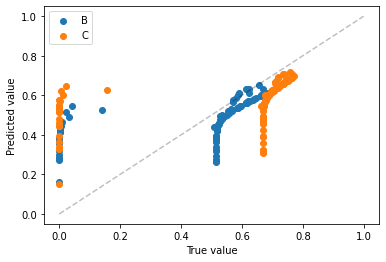

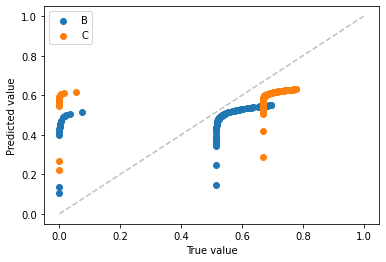

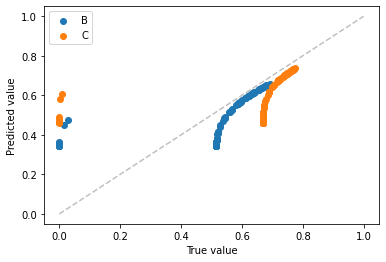

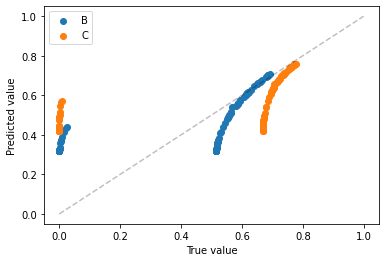

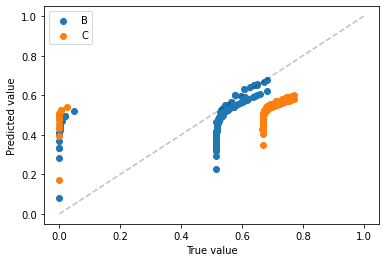

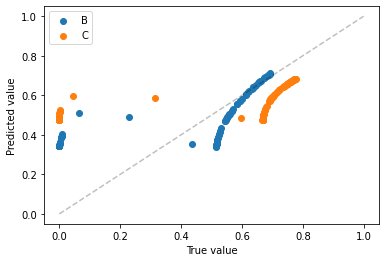

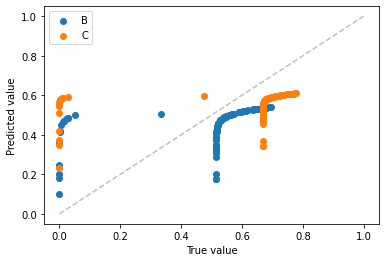

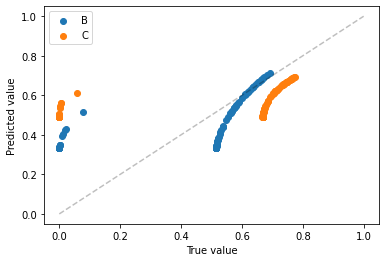

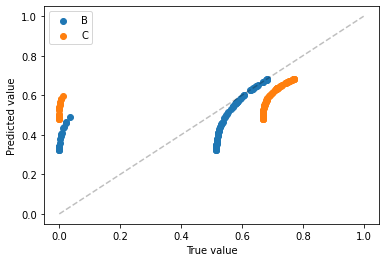

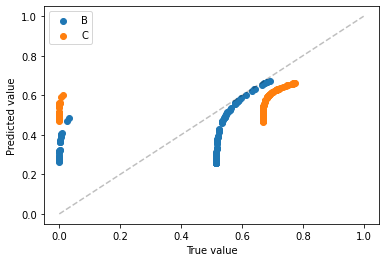

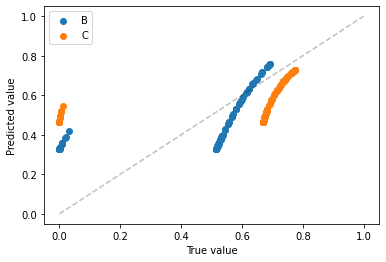

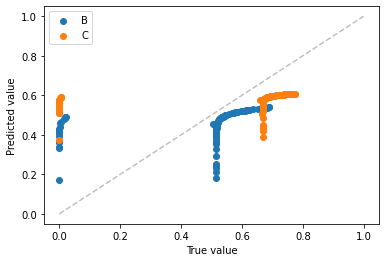

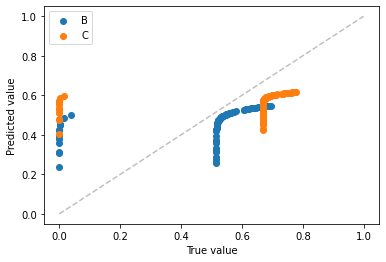

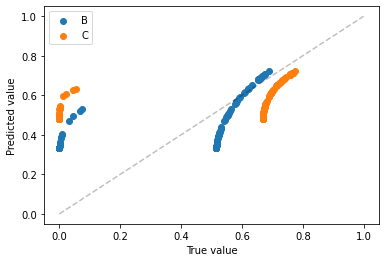

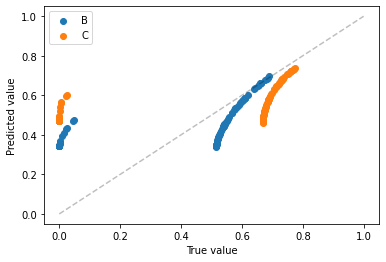

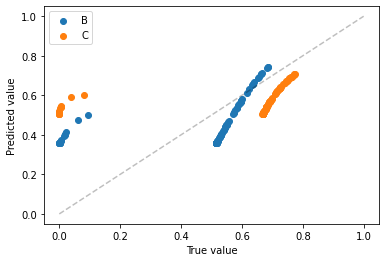

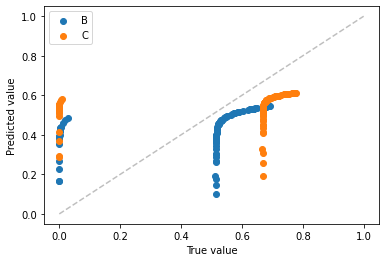

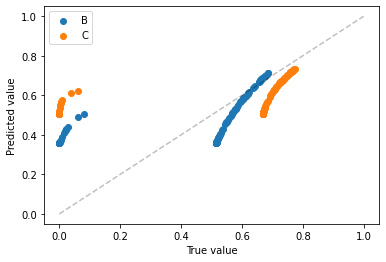

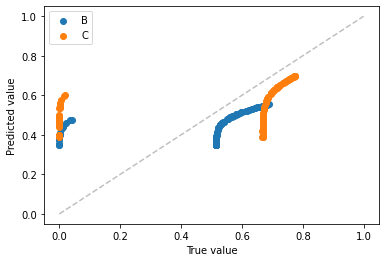

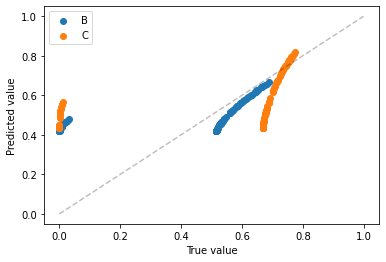

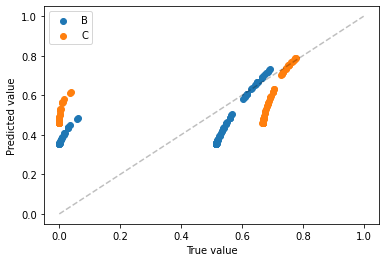

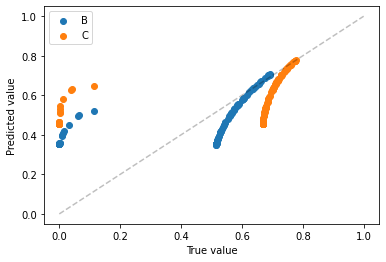

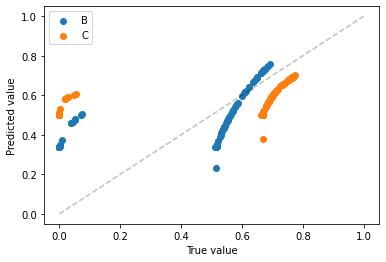

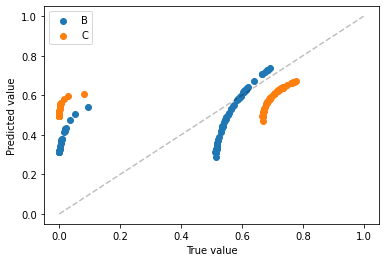

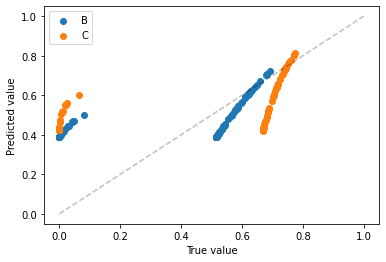

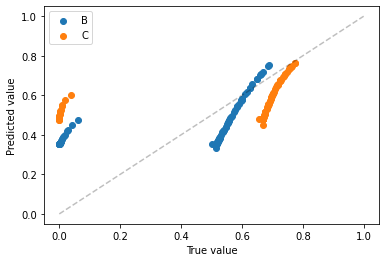

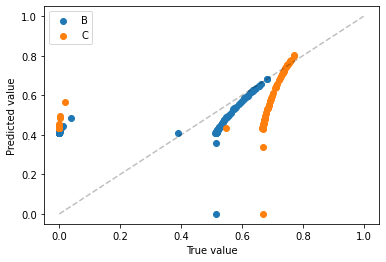

In [36]:
for i in range(50):
    plot_model(test_pred_2_pos[i], truth=test_truth_2_pos[i], nodes = ["B", "C"])

In [37]:
plt.close("all")

---------------------------------------
FOLD0


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


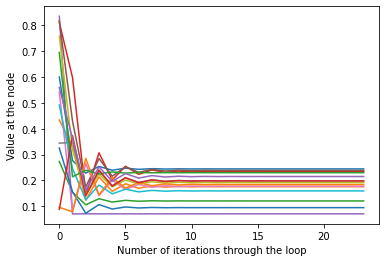

------------------------------------------
---------------------------------------
FOLD1


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


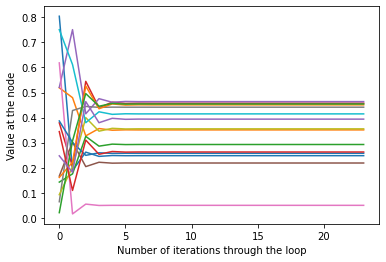

------------------------------------------
---------------------------------------
FOLD2


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


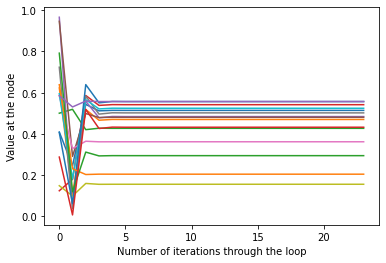

------------------------------------------
---------------------------------------
FOLD3


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


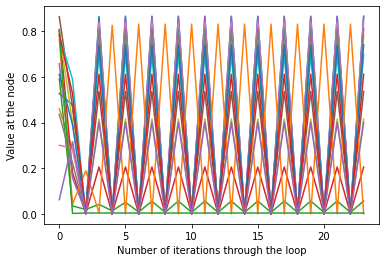

------------------------------------------
---------------------------------------
FOLD4


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


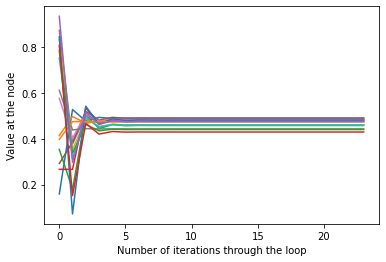

------------------------------------------
---------------------------------------
FOLD5


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


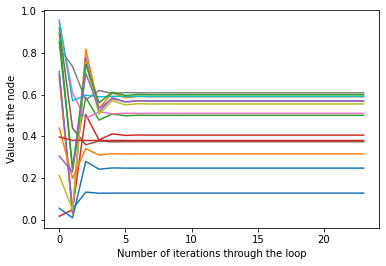

------------------------------------------
---------------------------------------
FOLD6


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


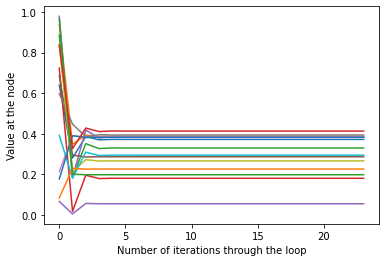

------------------------------------------
---------------------------------------
FOLD7


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


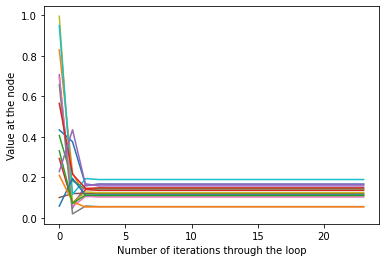

------------------------------------------
---------------------------------------
FOLD8


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


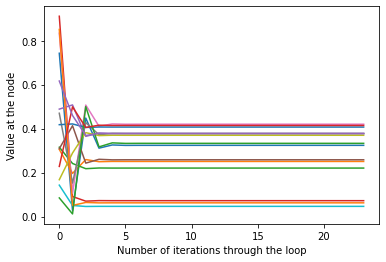

------------------------------------------
---------------------------------------
FOLD9


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


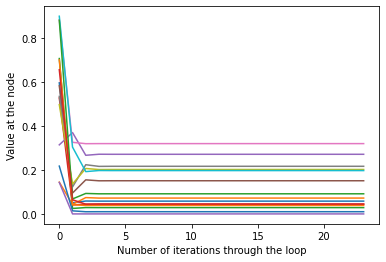

------------------------------------------
---------------------------------------
FOLD10


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


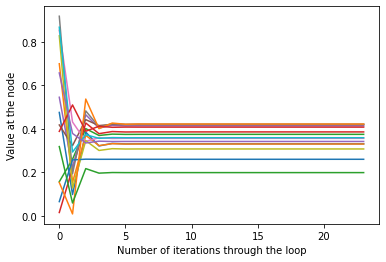

------------------------------------------
---------------------------------------
FOLD11


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


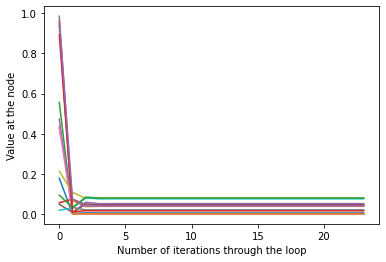

------------------------------------------
---------------------------------------
FOLD12


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


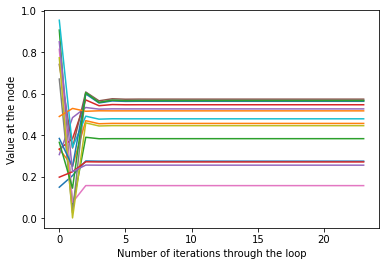

------------------------------------------
---------------------------------------
FOLD13


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


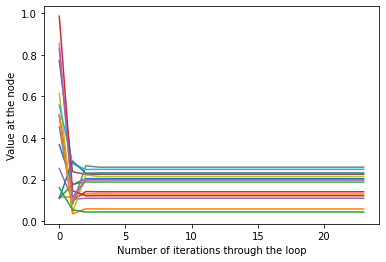

------------------------------------------
---------------------------------------
FOLD14


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


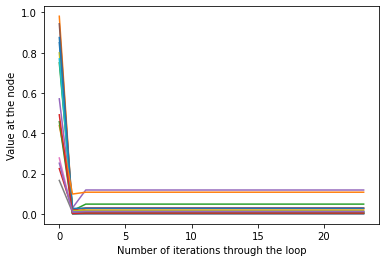

------------------------------------------
---------------------------------------
FOLD15


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


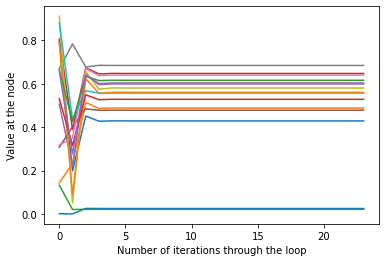

------------------------------------------
---------------------------------------
FOLD16


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


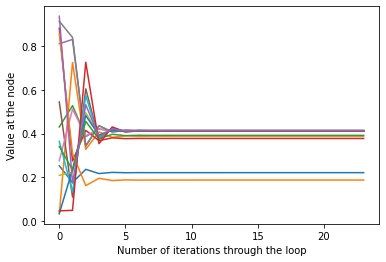

------------------------------------------
---------------------------------------
FOLD17


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


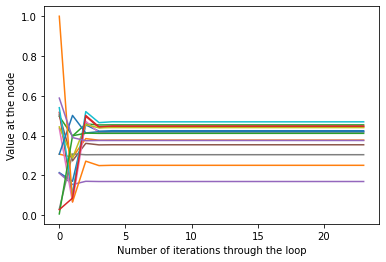

------------------------------------------
---------------------------------------
FOLD18


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


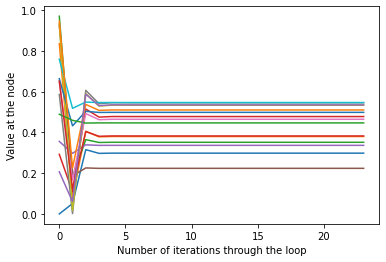

------------------------------------------
---------------------------------------
FOLD19


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


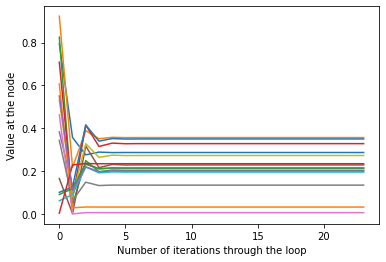

------------------------------------------
---------------------------------------
FOLD20


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


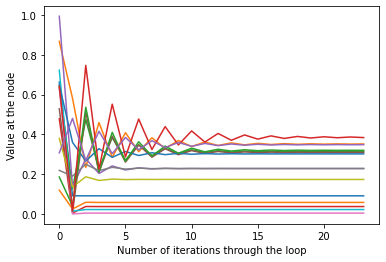

------------------------------------------
---------------------------------------
FOLD21


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


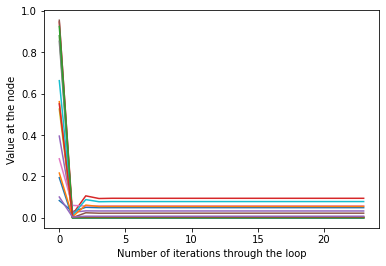

------------------------------------------
---------------------------------------
FOLD22


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


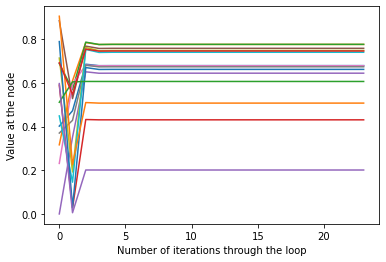

------------------------------------------
---------------------------------------
FOLD23


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


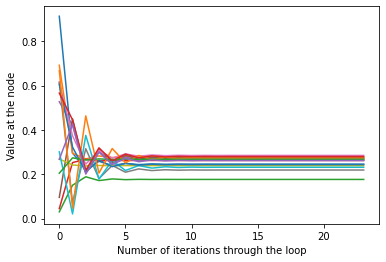

------------------------------------------
---------------------------------------
FOLD24


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


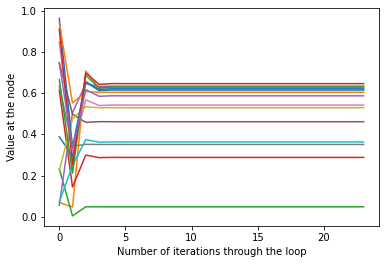

------------------------------------------
---------------------------------------
FOLD25


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


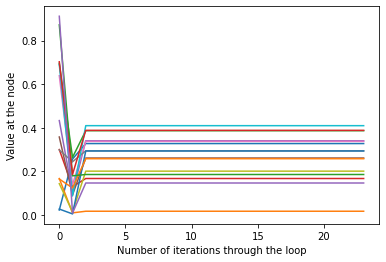

------------------------------------------
---------------------------------------
FOLD26


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


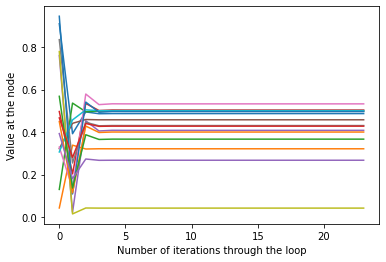

------------------------------------------
---------------------------------------
FOLD27


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


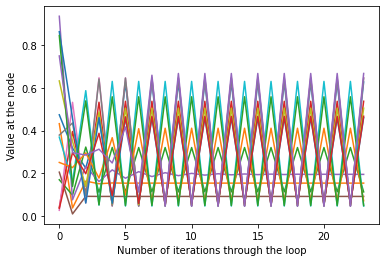

------------------------------------------
---------------------------------------
FOLD28


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


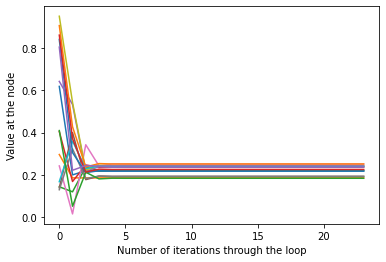

------------------------------------------
---------------------------------------
FOLD29


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


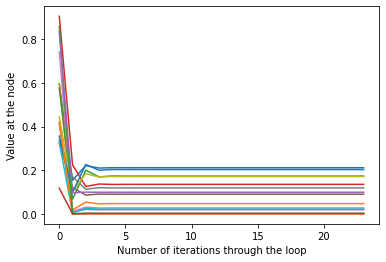

------------------------------------------
---------------------------------------
FOLD30


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


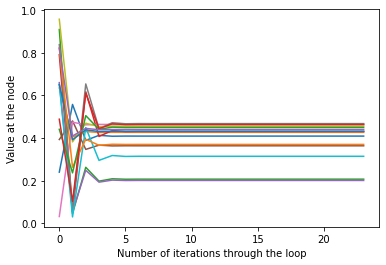

------------------------------------------
---------------------------------------
FOLD31


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


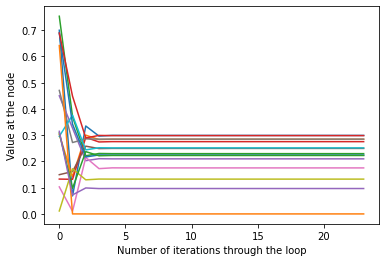

------------------------------------------
---------------------------------------
FOLD32


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


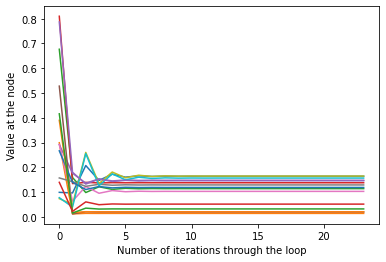

------------------------------------------
---------------------------------------
FOLD33


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


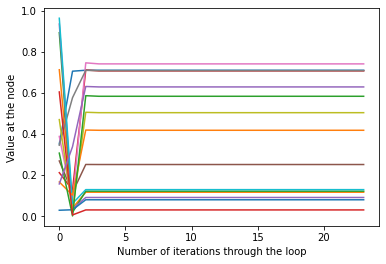

------------------------------------------
---------------------------------------
FOLD34


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


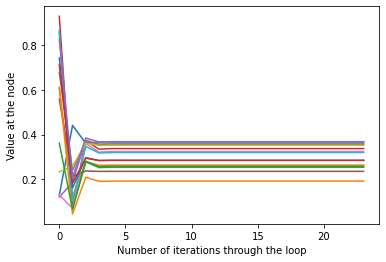

------------------------------------------
---------------------------------------
FOLD35


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


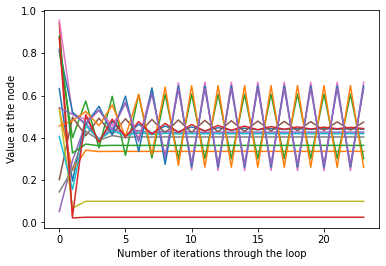

------------------------------------------
---------------------------------------
FOLD36


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


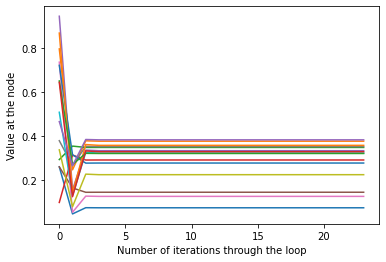

------------------------------------------
---------------------------------------
FOLD37


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


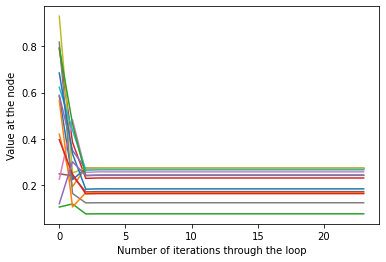

------------------------------------------
---------------------------------------
FOLD38


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


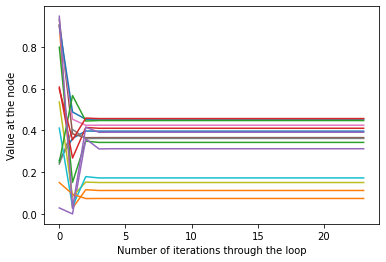

------------------------------------------
---------------------------------------
FOLD39


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


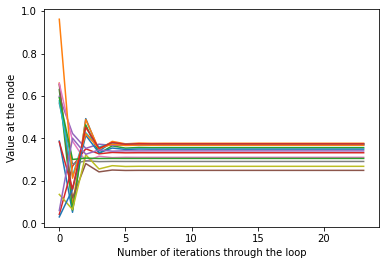

------------------------------------------
---------------------------------------
FOLD40


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


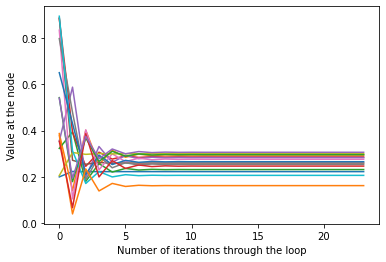

------------------------------------------
---------------------------------------
FOLD41


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


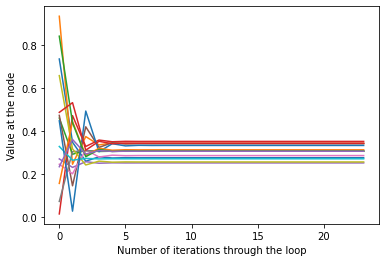

------------------------------------------
---------------------------------------
FOLD42


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


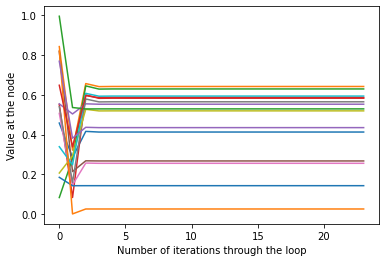

------------------------------------------
---------------------------------------
FOLD43


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


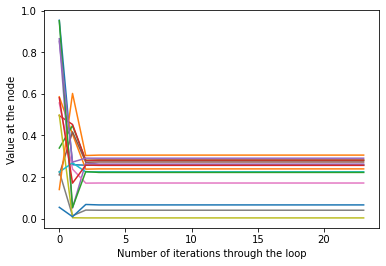

------------------------------------------
---------------------------------------
FOLD44


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


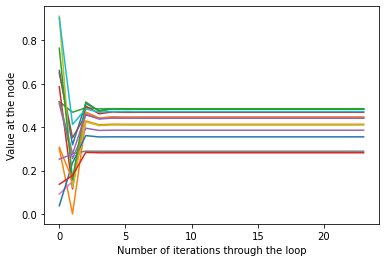

------------------------------------------
---------------------------------------
FOLD45


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


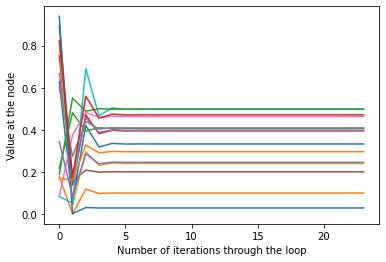

------------------------------------------
---------------------------------------
FOLD46


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


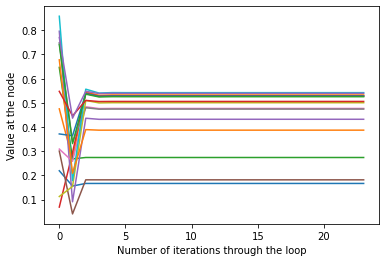

------------------------------------------
---------------------------------------
FOLD47


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


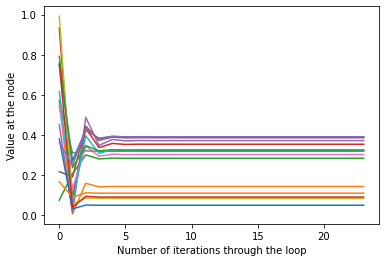

------------------------------------------
---------------------------------------
FOLD48


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


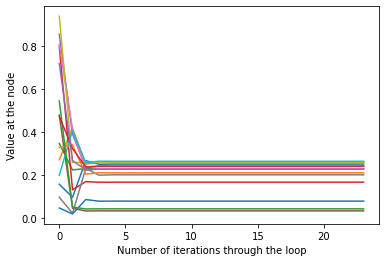

------------------------------------------
---------------------------------------
FOLD49


/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:585: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(
/home/ubuntu/storage/BioNICs/bionics/biofuzznet/biofuzznet.py:520: UserWarning: convergence_check has been set to True. All simulation states will be saved and returned. This has not been optimised for memory usage and is implemented in a naive manner. Proceed with caution.
  warnings.warn(


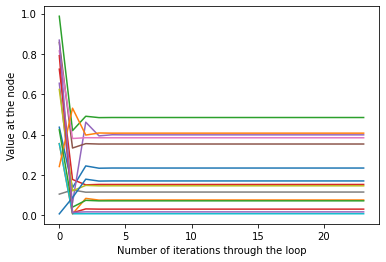

------------------------------------------


In [38]:
check_convergence_status("neg", params_truth_1_neg)

In [39]:
plt.close("all")

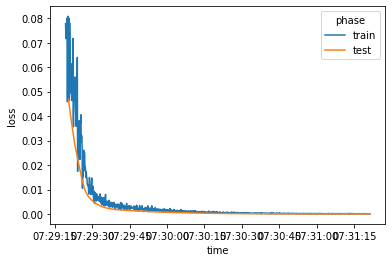

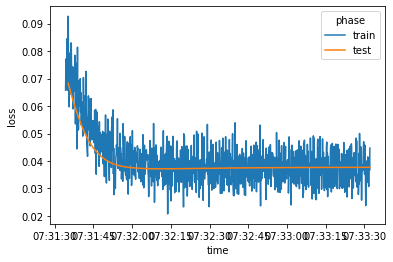

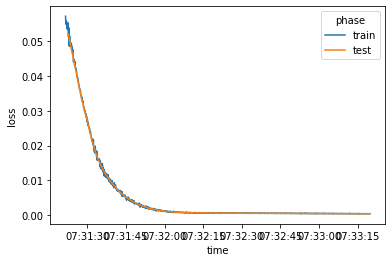

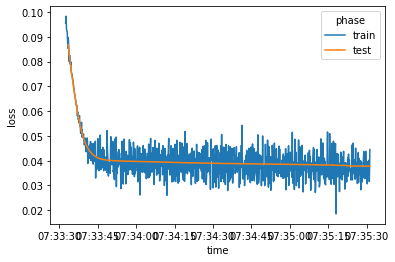

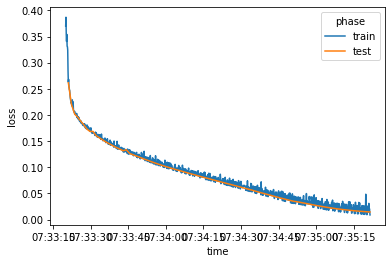

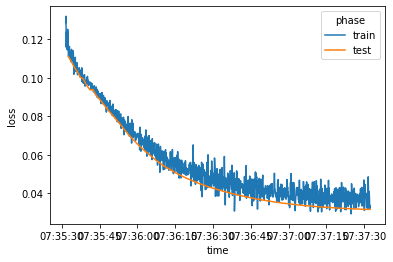

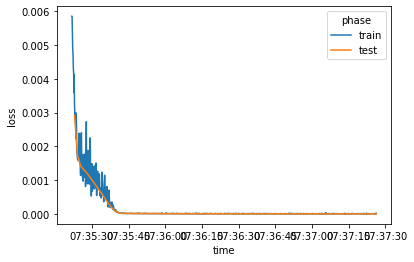

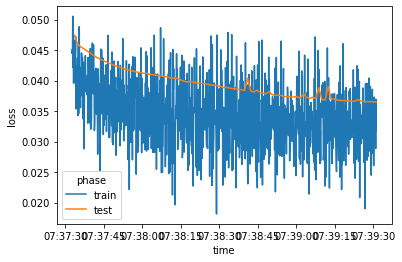

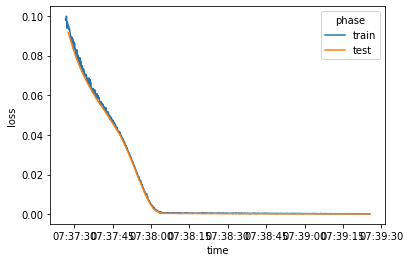

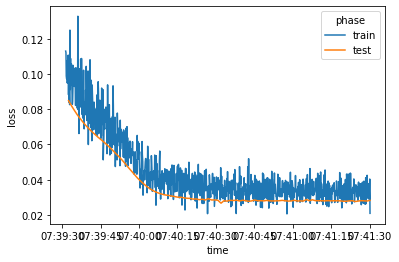

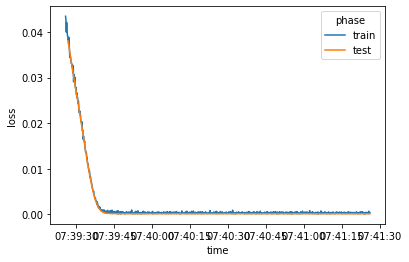

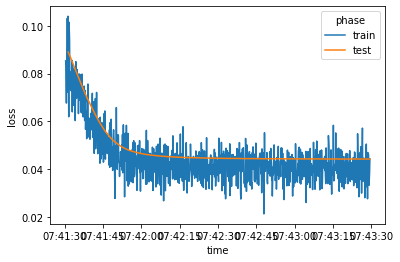

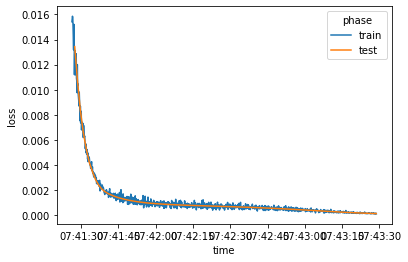

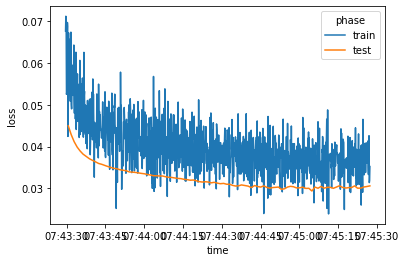

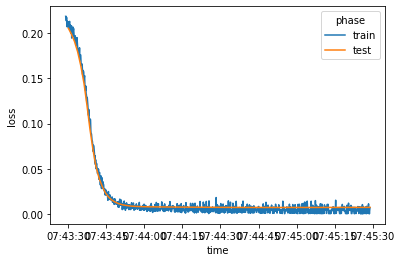

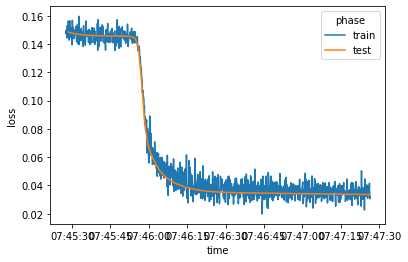

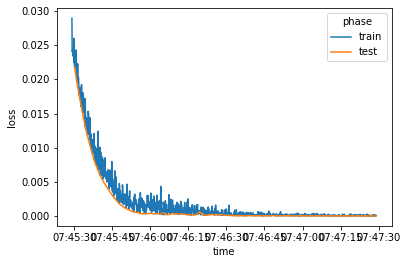

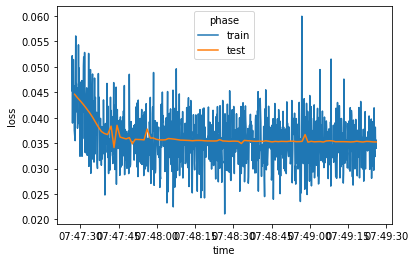

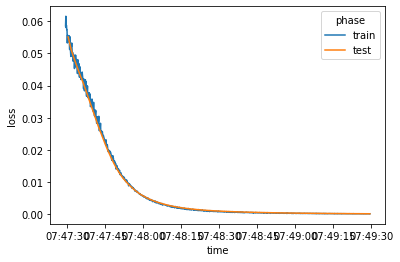

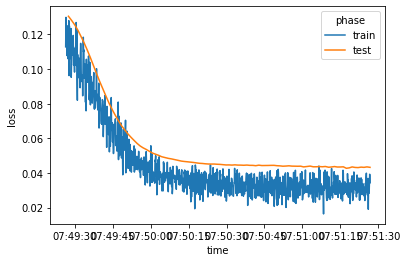

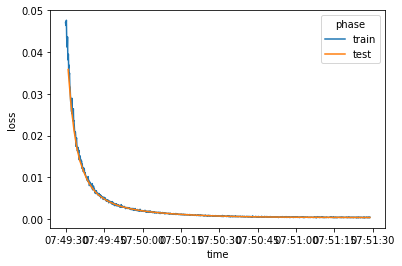

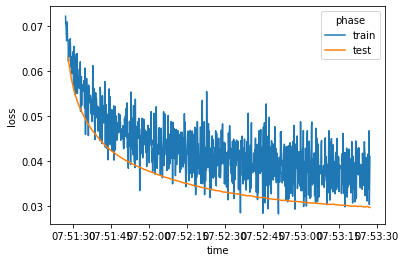

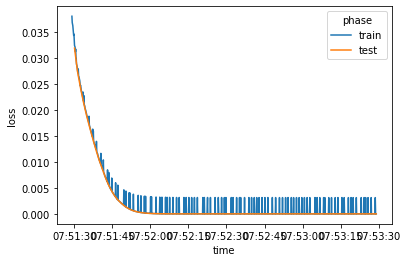

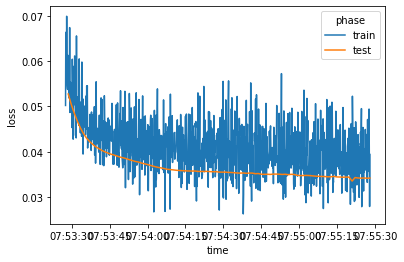

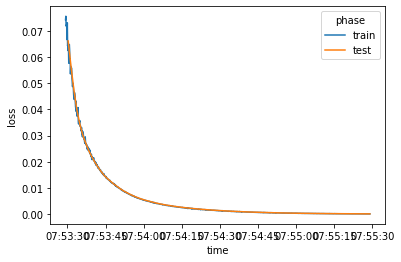

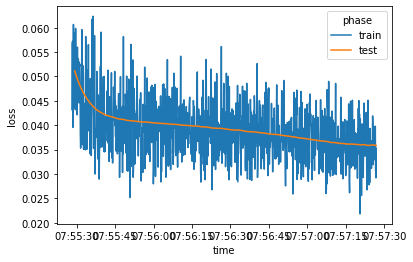

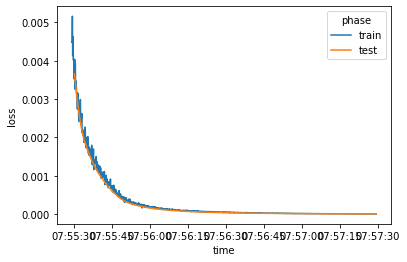

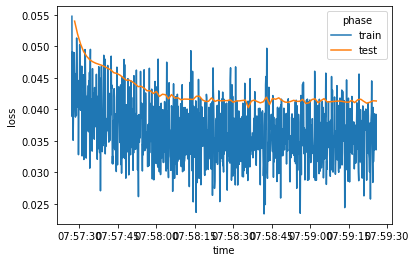

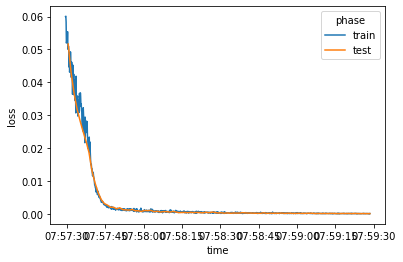

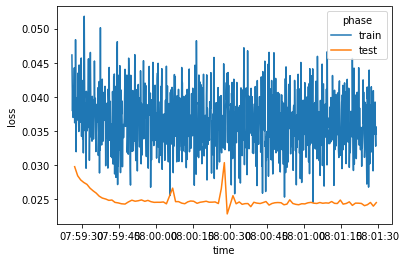

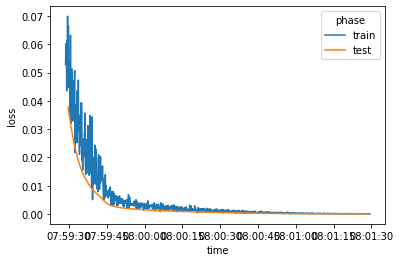

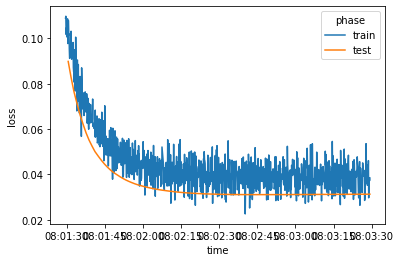

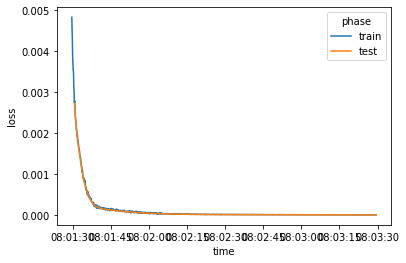

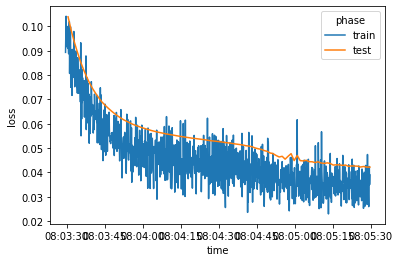

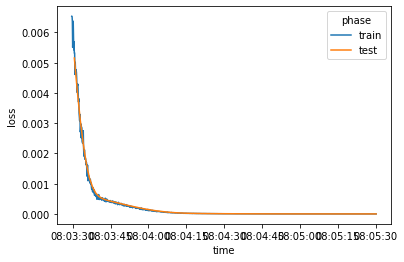

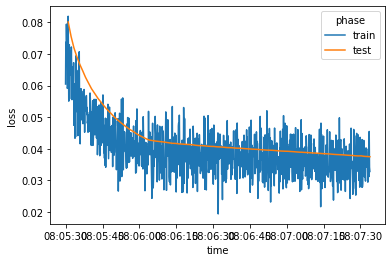

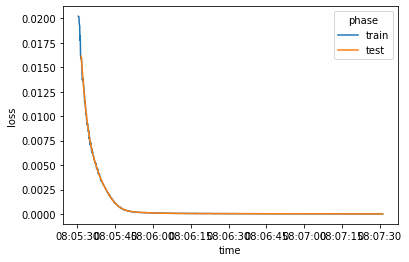

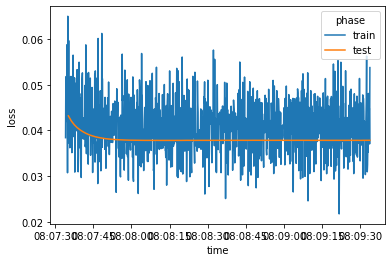

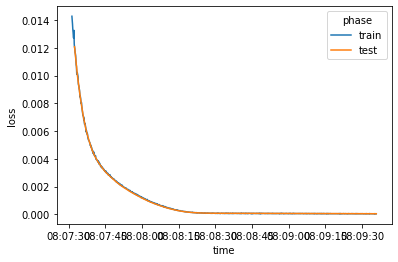

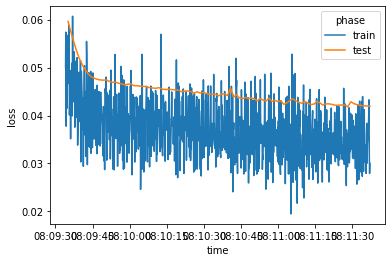

In [30]:
for i in range(20):
    loss = losses_1_pos[i]
    lossbis = losses_2_pos[i]
    sns.lineplot(data=loss, x="time", y="loss", hue="phase")
    plt.show()
    plt.figure()
    sns.lineplot(data=lossbis, x="time", y="loss", hue="phase")
    plt.show()

In [31]:
plt.close("all")